<a href="https://www.kaggle.com/code/marcinrutecki/telco-churn-eda-model-voting-boosting?scriptVersionId=119833792" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">📞 Telco Churn - EDA & Model 📲</div>

In [1]:
from IPython.display import Image
# https://www.freepik.com/free-photo/emoji-faces-social-media_4191317.htm#query=dissatisfird%20customers&position=14&from_view=search&track=ais

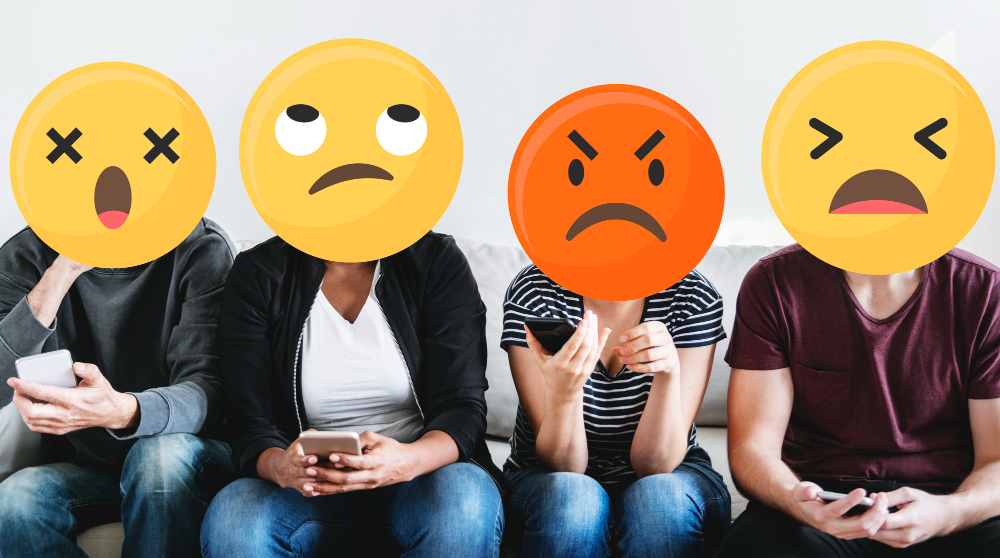

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

<a id="1.2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Introduction</div>

* For telco companies it is crucial to attract new customers and at the same time to avoid churning.
* It costs the company a lot when the customers churn.
* The key challenge is to predict if an individual customer will churn or not.
* The extra challenge is to identify the key components of churning.

<a id="1.2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Table of Contents</div>

<a id="toc"></a>
- [1. Set-up](#1)
    - [1.1 Import Libraries](#1.1)
    - [1.2 Import Data](#1.2)
    - [1.3 Data Set Characteristics](#1.3)
    - [1.4 Dataset Attributes](#1.4)
- [2. Exploring data set](#2)
    - [2.1 Quick overview](#2.1)
- [3. Data preprocessing](#3)
    - [3.1 Dealing with missing values](#3.1)
    - [3.2 Dealin with error: could not convert string to float:](#3.2)
    - [3.3 Dealing with duplicated values](#3.3)
    - [3.4 Creating numerical and categorical lists](#3.4)
    - [3.5 Label Encoding](#3.5)
    - [3.6 Train dataset - Basic statistics](#3.6)
- [4. Data imbalance check](#4)
    - [4.1 Imbalanced data requires different approach](#4.1)
    - [4.2 Choosing the most suitable metrics](#4.2)
- [5. EDA](#5)
    - [5.1 Checking distributions](#5.1)
    - [5.2 Checking for outliers - Inter Quartile Range (IQR)](#5.2)
    - [5.3 Numerical Features vs Target Variable (Churn)](#5.3)
    - [5.4 Summary](#5.4)
    - [5.5 Categorical Features vs Target Variable (Churn)](#5.4)
        - [5.5.1 Customer information: Gender, SeniorCitizen, Partner, Dependents](#5.5.1)
        - [5.5.2 Provided services: PhoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies](#5.5.2)
        - [5.5.3 Support services: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport](#5.5.3)
        - [5.5.4 Payments: Contract, PaperlessBilling, PaymentMethod](#5.5.4)
- [6. Feature Engineering](#6)
    - [6.1 Train test split - stratified splitting](#6.1)
    - [6.2 Feature scaling](#6.2)
    - [6.3 One hot Encoder](#6.3)
        - [6.3.1 What have we done?](#6.3.1)
        - [6.3.2 Test data set](#6.3.2)
- [7. Model building](#7)
    - [7.1 Feature importance](#7.1)
    - [7.2 Baseline - Random Forest](#7.2)
        - [7.2.1 K-Fold Cross-validation](#7.2.1)
        - [7.2.2 Hyperparameter Tuning Using GridSearchCV](#7.2.2)
        - [7.3.1 K-Fold Cross-validation](#7.2.3)
    - [7.3 Adding another classifier - XGBoost](#7.3)
        - [7.3.1 K-Fold Cross-validation](#7.3.1)
        - [7.3.2 Hyperparameter Tuning Using GridSearchCV](#7.3.2)
        - [7.3.3 K-Fold Cross-validation](#7.3.3)
    - [7.4 Voting Clasifier](#7.4)
        - [7.4.1 K-Fold Cross-validation](#7.4.1)   
- [8. Result comparison](#8)
    - [8.1 AUC-ROC Curve for the best algorithm](#8.1)
    - [8.2 Precision-Recall Curve (PR curve) for the best algorithm](#8.2)
- [9. Possible further improvements](#9)
- [10. Check my other notebooks](#10)

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span> Set-up</div>

<a id="1.1"></a>
## <b>1.1 <span style='color:#E1B12D'>Import Libraries</span></b> 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

<a id="1.2"></a>
## <b>1.2 <span style='color:#E1B12D'>Import Data</span></b> 

In [4]:
try:
    raw_df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
except:
    raw_df = pd.read_csv('telco.csv')

<a id="1.3"></a>
## <b>1.3 <span style='color:#E1B12D'>Data Set Characteristics</span></b>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

<a id="1.4"></a>
## <b>1.4 <span style='color:#E1B12D'>Dataset Attributes</span></b> 


* <code>customerID</code> - Customer ID

* <code>gender</code> - Whether the customer is a male or a female

* <code>SeniorCitizen</code> - Whether the customer is a senior citizen (1, 0)

* <code>Partner</code> - Whether the customer has a partner (Yes, No)

* <code>Dependents</code> - Whether the customer has dependents (Yes, No)

* <code>tenure</code> - Number of months the customer has stayed with the company

* <code>PhoneService</code> - Whether the customer has a phone service (Yes, No)

* <code>MultipleLines</code> - Whether the customer has multiple lines (Yes, No, No phone service)

* <code>InternetService</code> - Customer’s internet service provider (DSL, Fiber optic, No)

* <code>OnlineSecurity</code> - Whether the customer has online security (Yes, No, No internet service)

* <code>OnlineBackup</code> - Whether the customer has online backup or not (Yes, No, No internet service)

* <code>DeviceProtection</code> - Whether the customer has device protection (Yes, No, No internet service)

* <code>TechSupport</code> - Whether the customer has tech support (Yes, No, No internet service)

* <code>StreamingTV</code> - Whether the customer has streaming TV service (Yes, No, No internet service)

* <code>StreamingMovies</code> - Whether the customer has streaming movies service (Yes, No, No internet service)

* <code>Contract</code> - Indicates the type of the contract (Month-to-month, One year, Two year)

* <code>PaperlessBilling</code> - Whether the customer has paperless billing (Yes, No)

* <code>PaymentMethod</code> - Indicates the payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

* <code>MonthlyCharges</code> - Indicates the current monthly subscription cost of the customer

* <code>TotalCharges</code> - Indicates the total charges paid by the customer so far

* <code>Churn</code> - Indicates whether the customer churned

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span> Exploring data set</div>

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observations in Train dataset:

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li>There are total of 21 columns: 3 numerical, 16 categorical, 1 id and 1 target column
<li>'Total Charges' provides a numerical values, but the numbers are stored as on object
<li>Some categorical features are stored as a string
<li>There are 7043 rows in entire data set
<li>Churn is the target variable
</ul>
</div>

<a id="2.1"></a>
## <b>2.1 <span style='color:#E1B12D'>Quick overview</span></b> 

In [6]:
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="3"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span> Data preprocessing</div>

We don't need a customerID column, so I'll delete it.

In [7]:
df = raw_df.drop('customerID', axis=1)

<a id="3.1"></a>
## <b>3.1 <span style='color:#E1B12D'>Dealing with missing values</span></b> 

In [8]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The are no missing values in data set.

<a id="3.2"></a>
## <b>3.2 <span style='color:#E1B12D'>Dealin with error: could not convert string to float: ''</span></b> 

In [9]:
 # df['TotalCharges'] = df['TotalCharges'].astype(float)

An error occured when trying to execule a code above: could not convert string to float: ''

The string to be converted must not contain any characters or symbols. The error occurs due to the incorrect initialization of value to a string variable.

We have probably empty strings in 'TotalCharges' colums, but as they were defined as string, they didn't appear as Null Values.

In [10]:
step1 = [len(i.split()) for i in df['TotalCharges']] # splitting individual elements of 'Total_Charges'
step2 = [i for i in range(len(step1)) if step1[i] != 1] # storing the index values of 'Total_Charges' where length is not equal to 1.
print('Number of entries with empty string: ', len(step2))

Number of entries with empty string:  11


We coud try to impute the missing values by building a model for that reason or fill them using some often used values in that kind of situations e.g. mean, median or mode, but it's simpler (and probably better) to just drop the coresponding rows from a dataset as the numbers of empty string is very low (11).

In [11]:
df = df.drop(step2, axis = 0).reset_index(drop=True) # Dropping rows with no values in 'Total_charges'

In [12]:
df['TotalCharges'] = df['TotalCharges'].astype(float) # Finally we can convert string to float in 'Total_charges' column

<a id="3.3"></a>
## <b>3.3 <span style='color:#E1B12D'>Dealing with duplicated values</span></b> 

In [13]:
print('Number of duplicated values in training dataset: ', df.duplicated().sum())

Number of duplicated values in training dataset:  22


In [14]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


<a id="3.4"></a>
## <b>3.4 <span style='color:#E1B12D'>Creating numerical and categorical lists</span></b> 

In [15]:
# distinction is based on the number of different values in the column

columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1] # Excluding 'Churn'

In [16]:
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

<a id="3.5"></a>
## <b>3.5 <span style='color:#E1B12D'>Label Encoding</span></b> 

In [17]:
# Label Encoding refers to converting the labels into a numeric form. 
# This is only for EDA reasons. Later we will use OneHotEncoder to prepare for model building.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy()

df1[categoric_columns] = df1[categoric_columns].apply(le.fit_transform)
df1[['Churn']] = df1[['Churn']].apply(le.fit_transform)

<a id="3.6"></a>
## <b>3.6 <span style='color:#E1B12D'>Train dataset - Basic statistics</span></b>

In [18]:
df1[numeric_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


In [19]:
#Defining colors for the plots
palette = ['#008080','#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="4"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span> Data imbalance check</div>

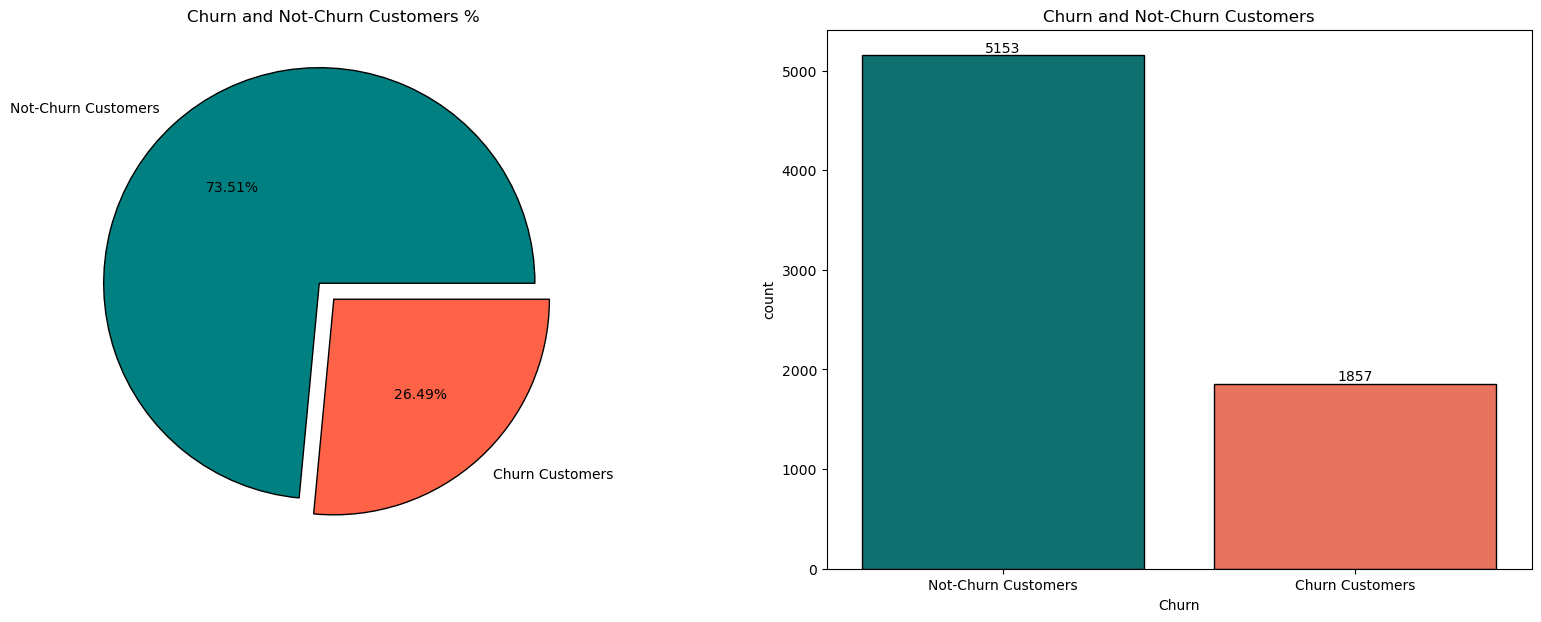

In [20]:
l1 = list(df1['Churn'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Not-Churn Customers','Churn Customers'], 
        autopct = '%1.2f%%',
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Churn and Not-Churn Customers %');

plt.subplot(1,2,2)
ax = sns.countplot(data = df1, 
                   x='Churn',
                   palette = palette, 
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Churn and Not-Churn Customers')
plt.show()

<a id="4.1"></a>
## <b>4.1 <span style='color:#E1B12D'>Imbalanced data requires different approach</span></b> 

Dataset is imbalanced with almost 1:4 ratio. It's not an extreme value, but it's still significant.

This means that a blind guess (bet on "Not-Churn") would give us accuracy of **73,51%**.


<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
<ul>
    <li>We should use stratified splitting during train-test split.</li>
    <li>We should be extra careful when dealing with outliers (we can delete meaningull information).</li>    
    <li>We should consider undersampling or oversampling techniques.</li>
</ul>
</div>

> Check this notebook for **<mark style="background-color:#E1B12D;color:white;border-radius:5px;opacity:1.0">MUCH more information</mark>** **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">about dealing with imbalanced datasets</mark>**: [Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)

<a id="4.2"></a>
## <b>4.2 <span style='color:#E1B12D'>Choosing the most suitable metrics</span></b> 

* We can assume that additional actions (to prevent churning) will help if applied to any Customer (churning or not).
* We can also expect that the additional care (or other activities) will cost us more effort.

And that’s why…

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
<ul>
<li>We want to avoid the situation when we identify churn Customer as not-churn, because in such case we lose the opportunity to prevent churn.
<li>When a not-churn Customer is identified as churning an extra effort will make no negative effect for the customer, but it will cost us extra effort. We can probably afford this scenario to some extent if it helps with churning customer identification.
</ul>
</div>

In other words we want to avoid false negatives as much as possible. A false negative case means that a churn-positive customer is assessed to not-churn, which is detrimental. False positives (a not-churn identified as churn) are not as important as preventing a churning. It will make no negative effect for the customer, but it will cost us extra effort.

**The most suitable metrics are**:

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
<ul>
    <li>Recall: the ability of a model to find all the relevant cases within a data set.</li>
    <li>ROC-AUC: ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.</li>    
</ul>
</div>


<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="5"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span> EDA</div>

> Check this notebook for **<mark style="background-color:#E1B12D;color:white;border-radius:5px;opacity:1.0">more information</mark>** about **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">creating a meaningfull EDA</mark>**: [How to create a meaningful EDA](https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda)

<a id="5.1"></a>
## <b>5.1 <span style='color:#E1B12D'>Checking distributions</span></b> 

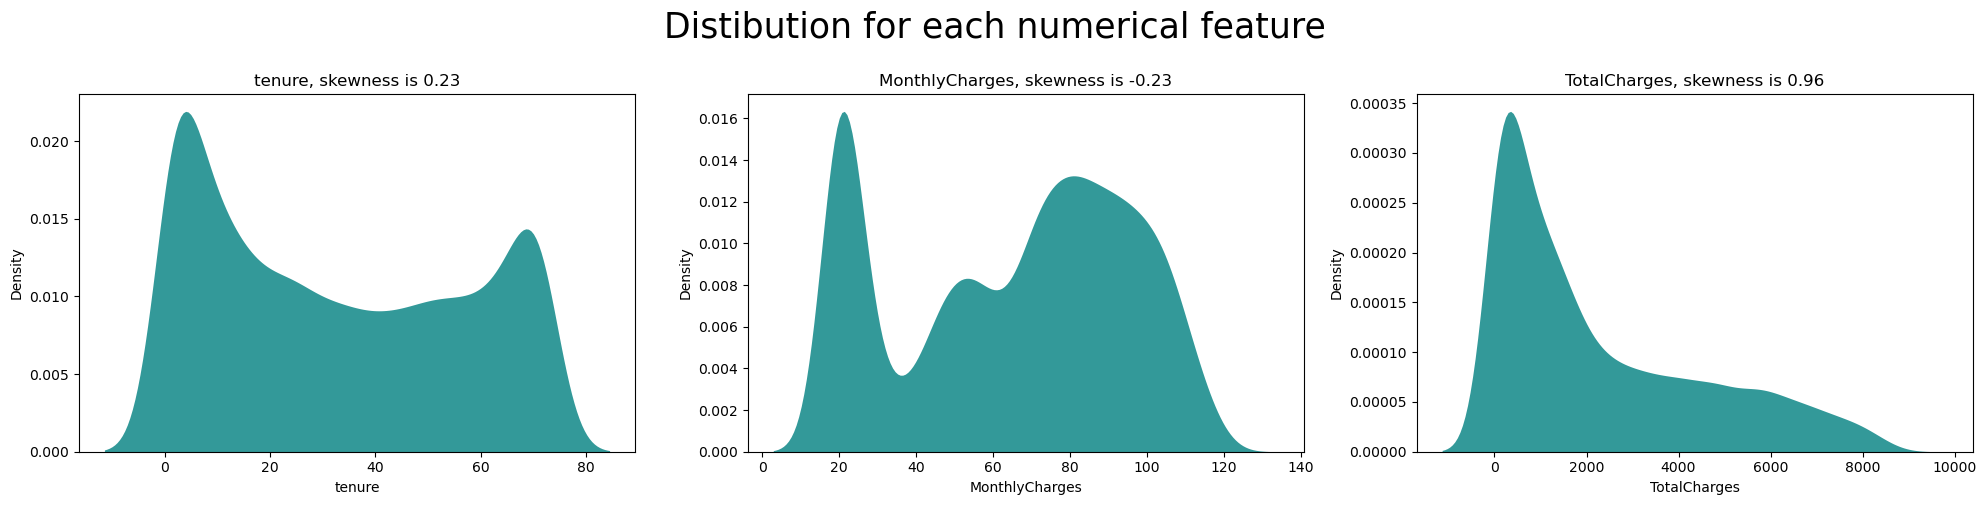

In [21]:
# Checking for distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(20,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

dist_custom(dataset=df1, columns_list=numeric_columns, rows=1, cols=3, suptitle='Distibution for each numerical feature')
plt.tight_layout()

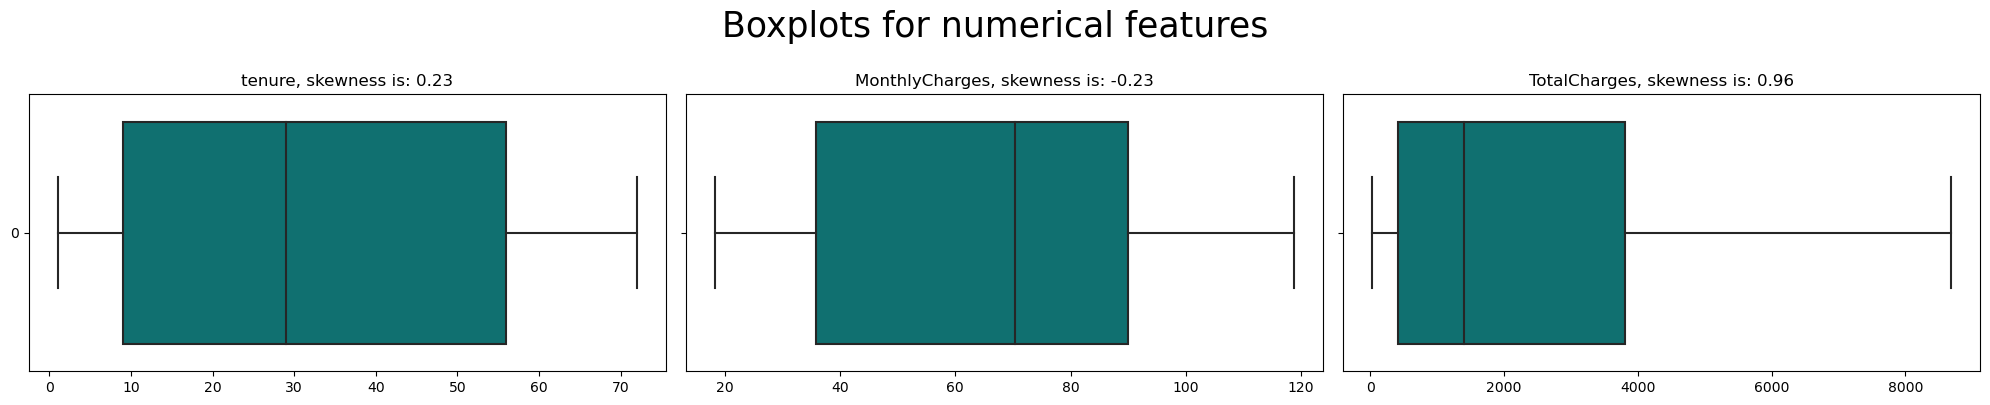

In [22]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20,4))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i], palette = palette)
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df1, columns_list=numeric_columns, rows=1, cols=3, suptitle='Boxplots for numerical features')
plt.tight_layout()

Conclusions:

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
<ul>
    <li>variables are not normally distributed;</li>
    <li>tenure and MonthlyCharges created kind of a bimodal distribution;</li>
    <li>TotalCharges is rightly skewed.</li>
</ul>
</div>


<a id="5.2"></a>
## <b>5.2 <span style='color:#E1B12D'>Checking for outliers - Inter Quartile Range (IQR)</span></b> 

Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

Procedure:

1. Find the first quartile, Q1.
2. Find the third quartile, Q3.
3. Calculate the IQR. IQR = Q3-Q1.
4. Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.

In [23]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [24]:
# Detecting and dropping outliers
Outliers_IQR = IQR_method(df,1,numeric_columns)
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


In [25]:
# Checking results
print ('The amount of frauds in df before dropping outliers: ', len(df[df['Churn'] == 1]))
print ('The amount of frauds in df after dropping outliers: ', len(df_out[df_out['Churn'] == 1]))

The amount of frauds in df before dropping outliers:  0
The amount of frauds in df after dropping outliers:  0


We don't have problem with outliers in this situation.

But we need to be extra careful when deleting outliers in
**<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">imbalanced data set</mark>** because by doing that we can
**<mark style="background-color:#E1B12D;color:white;border-radius:5px;opacity:1.0">get rid of important data!</mark>** After dropping outliers always check what you did!

<a id="5.3"></a>
## <b>5.3 <span style='color:#E1B12D'>Numerical Features vs Target Variable (Churn)</span></b> 

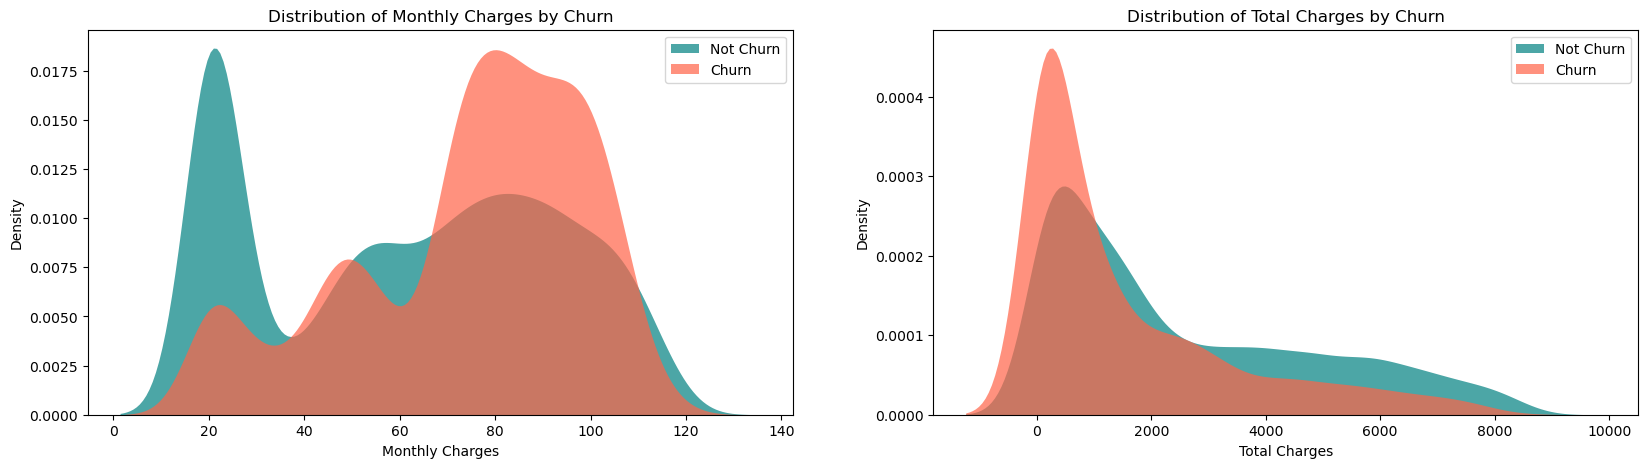

In [26]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

plt.subplot(1,2,2)
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')
plt.show()

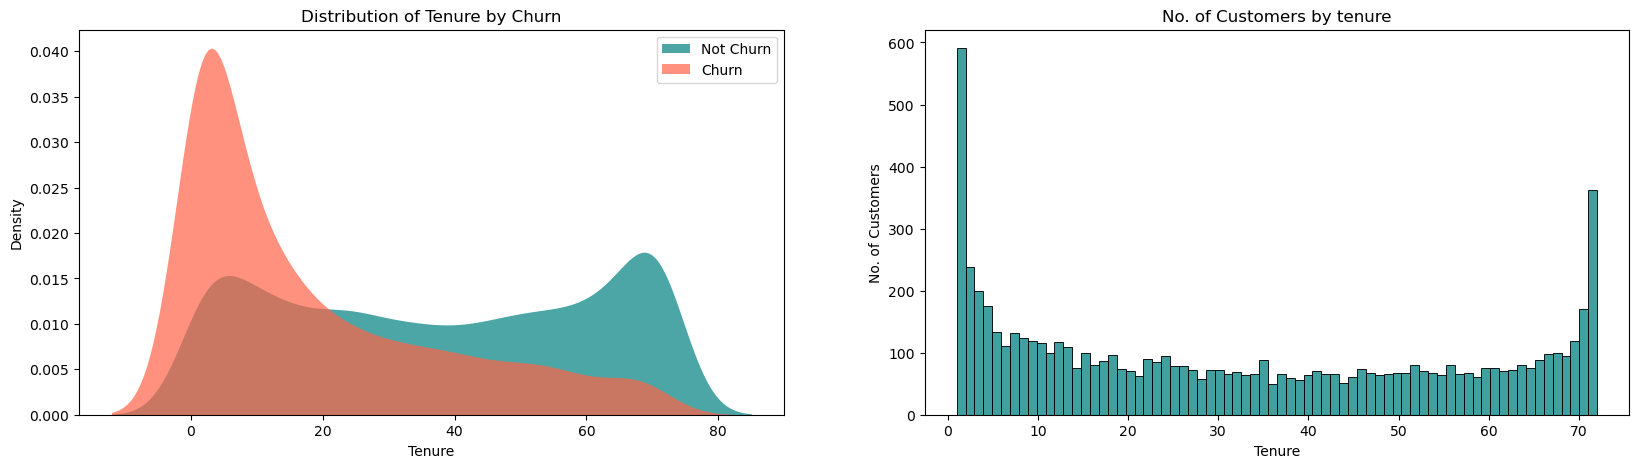

In [27]:
#plt.figure(figsize=(7,3))

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(df1.tenure[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.tenure[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of Tenure by Churn')

plt.subplot(1,2,2)
ax = sns.histplot(df1["tenure"], bins=72, kde=False, color='#008080')
ax.set(title = "No. of Customers by tenure")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')

plt.show()

The longer the customer has been with the provider the more likely he will not churn.

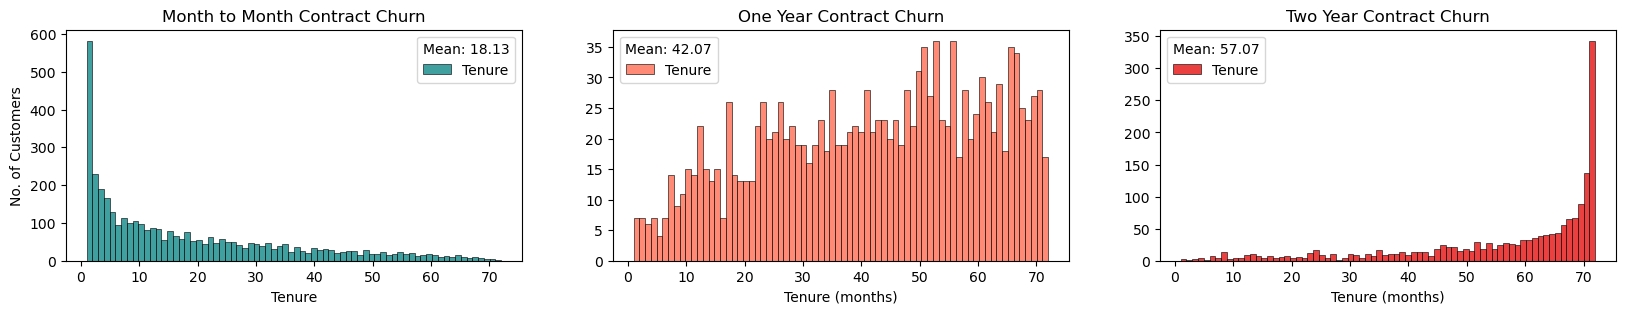

In [28]:
two_year_mean = round(df1[df1['Contract']==2]['tenure'].mean(),2)
month_mean = round(df1[df1['Contract']==0]['tenure'].mean(),2)
year_mean = round(df1[df1['Contract']==1]['tenure'].mean(),2)

fig = plt.subplots(nrows=1, ncols=3, figsize = (20,3))

plt.subplot(1,3,1)
ax = sns.histplot(df1[df1['Contract']==0]['tenure'], bins=72, color = '#008080')
ax.legend(['Tenure'],loc='upper right', title=(f'Mean: {month_mean}'))
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')
ax.set_title('Month to Month Contract Churn')

plt.subplot(1,3,2)
ax = sns.histplot(df1[df1['Contract']==1]['tenure'], bins=72, color = '#FF6347')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract Churn')

plt.subplot(1,3,3)
ax = sns.histplot(df1[df1['Contract']==2]['tenure'], bins=72, color = '#E50000')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {two_year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract Churn')

plt.show()

* a lot of Customers churned after just a month
* a lot of Customers are with the provider for 72 weeks
* the longer the contract, the longer customer stays with the provider (higher mean score)

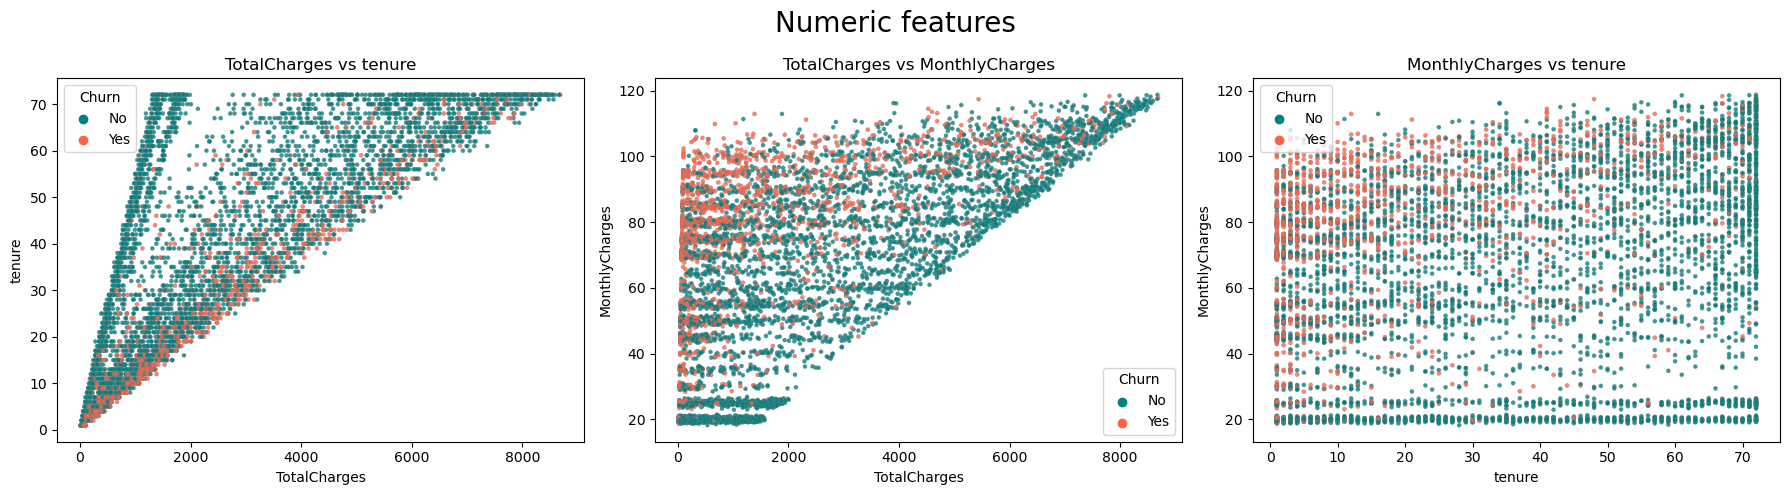

In [29]:
palette2 = ['#008080','#FF6347']

fig = plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
ax1 = sns.scatterplot(x = df['TotalCharges'], y = df['tenure'], hue = "Churn",
                    data = df, palette = palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('TotalCharges vs tenure')

plt.subplot(1,3,2)
ax2 = sns.scatterplot(x = df['TotalCharges'], y = df['MonthlyCharges'], hue = "Churn",
                    data = df, palette =palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('TotalCharges vs MonthlyCharges')

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x = df['tenure'], y = df['MonthlyCharges'], hue = "Churn",
                    data = df, palette =palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('MonthlyCharges vs tenure')

fig.suptitle('Numeric features', fontsize = 20)
plt.tight_layout()
plt.show()

<a id="5.4"></a>
## <b>5.4 <span style='color:#E1B12D'>Summary</span></b> 

From the plots above we can conclude that:

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
<ul>
    <li>a lot of customers churned after just a month;</li>
    <li>a lot of customers are with the provider for 72 weeks;</li>
    <li>the longer the contract, the longer customer stays with the provider (higher mean score);</li>
    <li>customers with higher Monthly Charges are more likely to churn;</li>
    <li>the longer the customer has been with the provider the more likely he will not churn.</li>

</ul>
</div>

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="5.5"></a>
## <b>5.5 <span style='color:#E1B12D'>Categorical Features vs Target Variable (Churn)</span></b> 

<a id="5.5.1"></a>
## <b>5.5.1 <span style='color:#E1B12D'>Customer information</span></b>
#### <b><span style='color:#E1B12D'>Gender, SeniorCitizen, Partner, Dependents</span></b> 

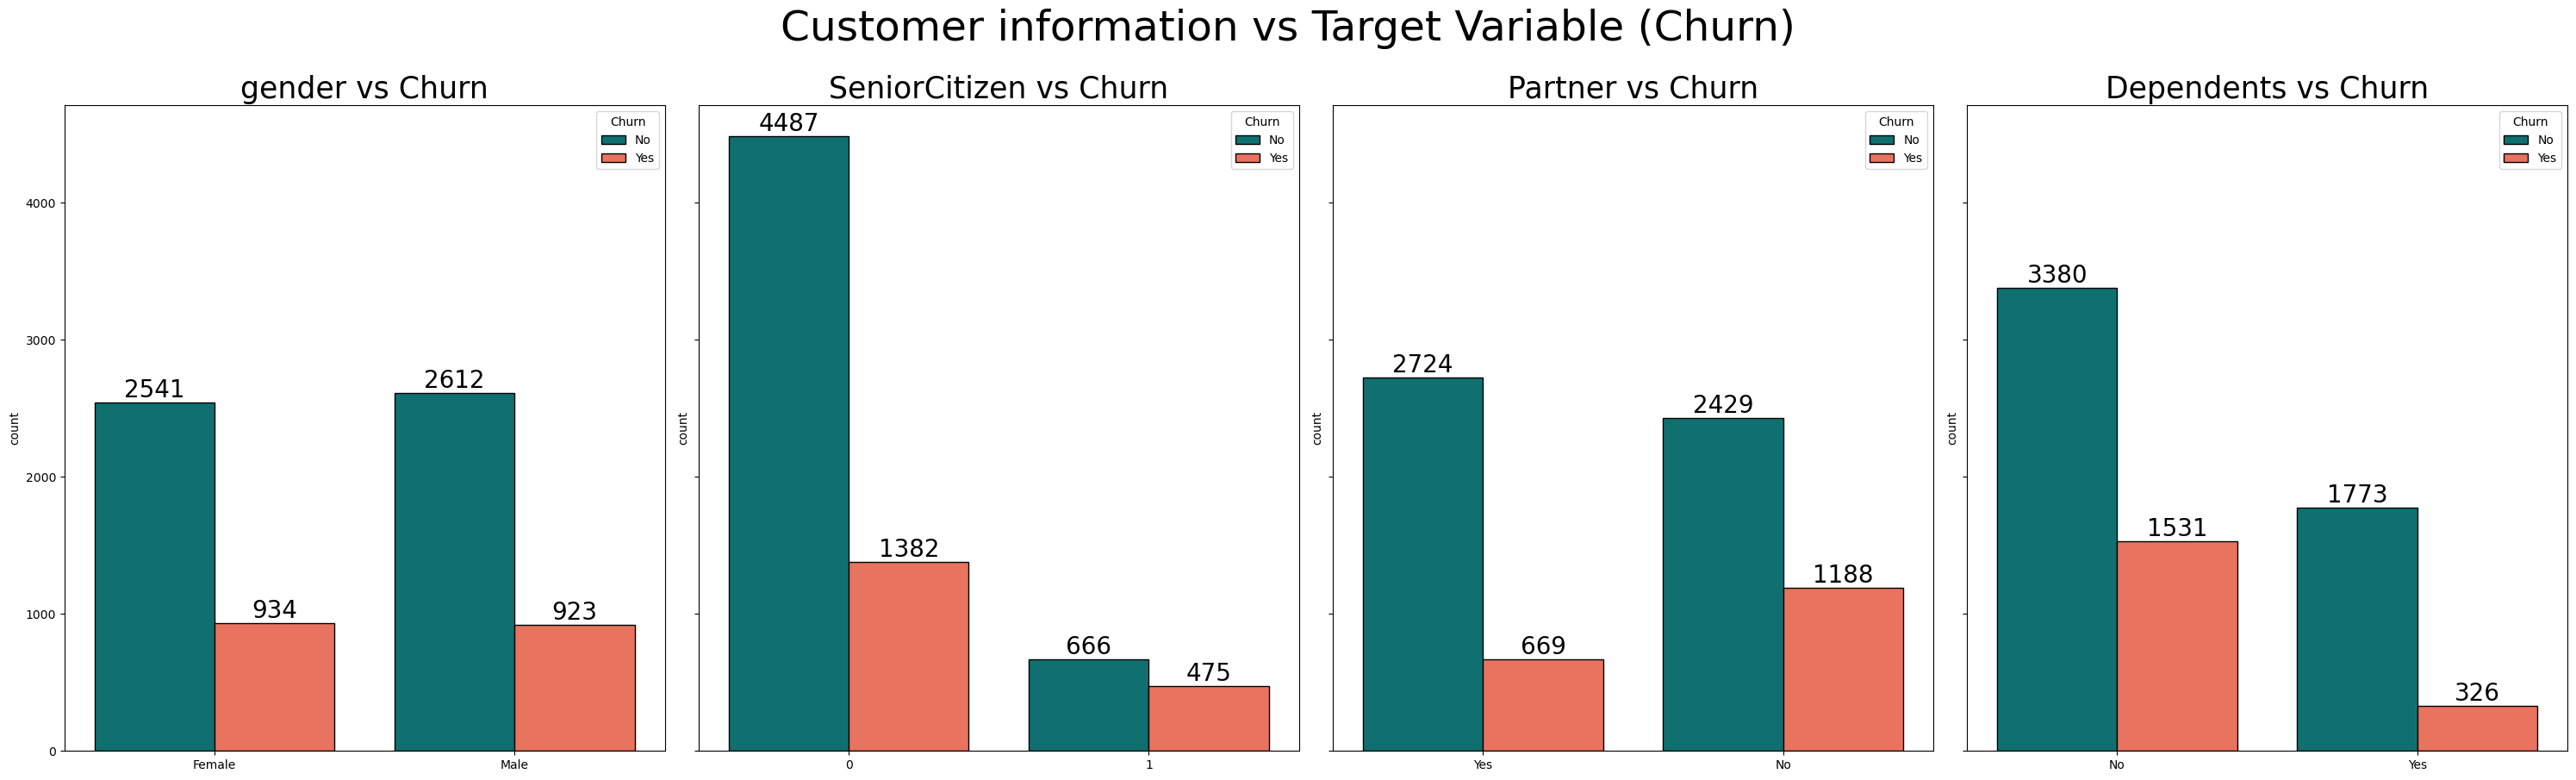

In [30]:
list1 = ['gender','SeniorCitizen','Partner','Dependents']
hue = "Churn"
figsize = (30,9)

# defining function for countplots
def countplots_custom(dataset, columns_list, rows, cols, figsize, suptitle, hue, palette):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=figsize)
    fig.suptitle(suptitle,y=1, size=35)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')
        axs[i].set_title(data + f' vs {hue}', size=25)
        for i in ax.containers:
            ax.bar_label(i,size=20)
            ax.set_xlabel('')
        
countplots_custom(dataset=df, columns_list=list1, rows=1, cols=4, figsize=figsize, hue = hue, palette = palette, suptitle='Customer information vs Target Variable (Churn)')
plt.tight_layout()

In [31]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
pie_values1 = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

senior = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
pie_values2 = [senior[0] / sum(senior) * 100, senior[1] / sum(senior) * 100]

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
pie_values3 = [partner[0] / sum(partner) * 100, partner[1] / sum(partner) * 100]

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
pie_values4 = [dependents[0] / sum(dependents) * 100, dependents[1] / sum(dependents) * 100]

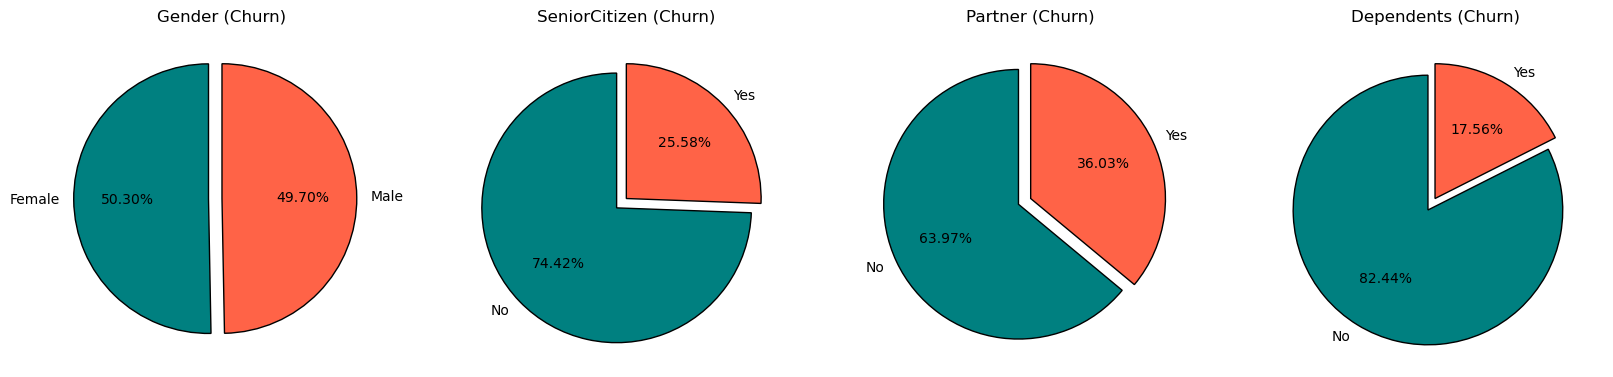

In [32]:
ax,fig = plt.subplots(nrows = 1, ncols = 4, figsize = (20,20))

plt.subplot(1,4,1)
plt.pie(pie_values1,labels = ['Female','Male'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender (Churn)')

plt.subplot(1,4,2)
plt.pie(pie_values2,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen (Churn)')

plt.subplot(1,4,3)
plt.pie(pie_values3,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner (Churn)')

plt.subplot(1,4,4)
plt.pie(pie_values4,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents (Churn)')

plt.show()

Dependence between gender and possibility of churn is small. Much more interesting is with Partner, Dependents and SeniorCitizen features.

<a id="5.5.2"></a>
## <b>5.5.2 <span style='color:#E1B12D'>Provided services</span></b>
#### <b><span style='color:#E1B12D'>PhoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies</span></b>

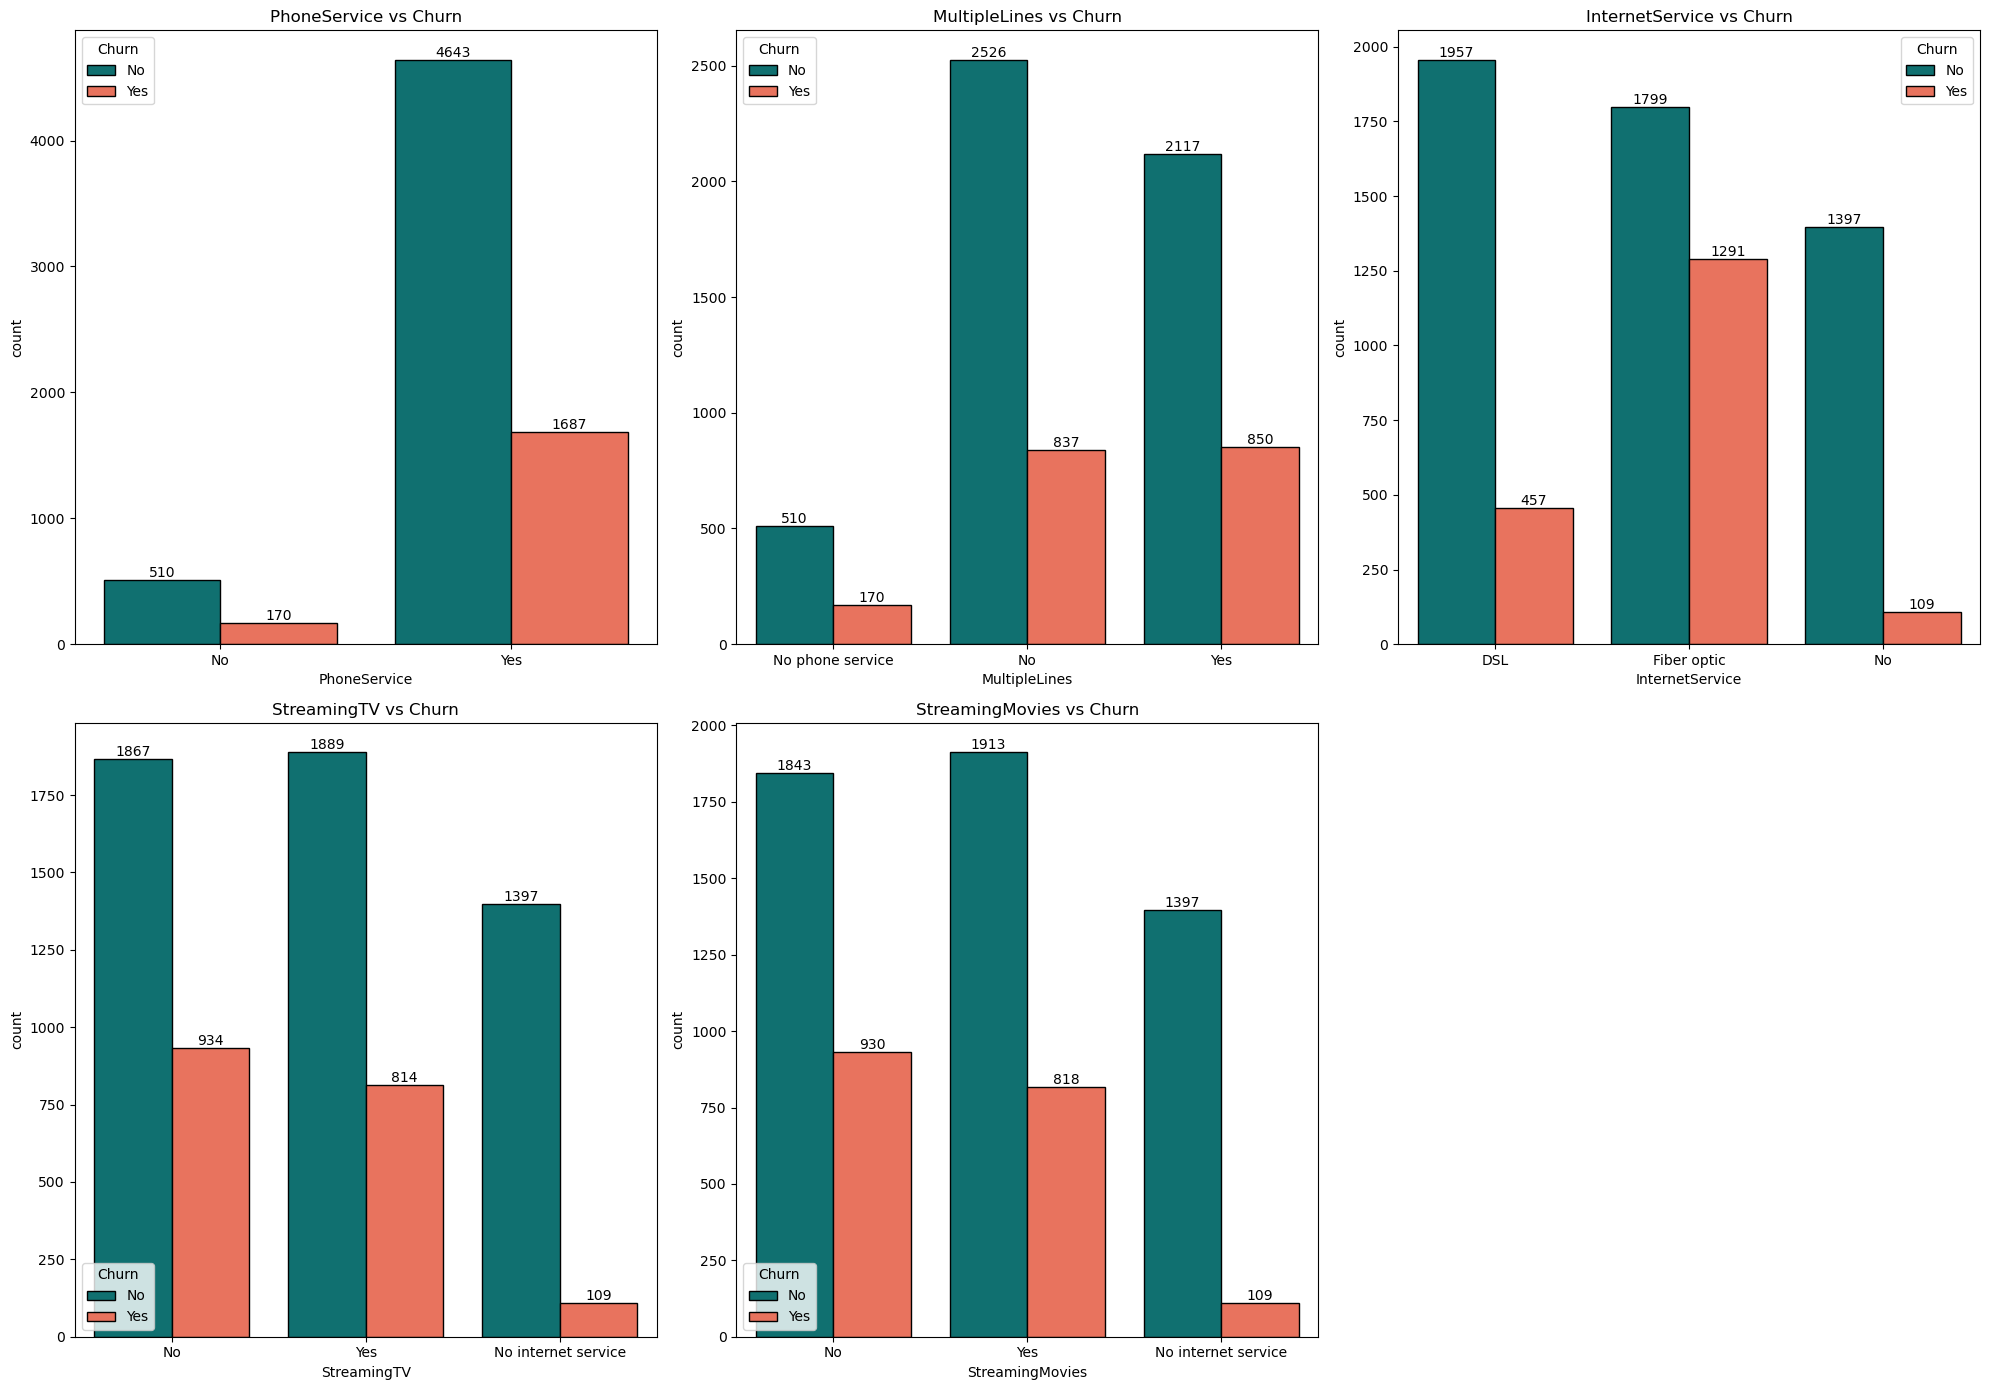

In [33]:
list2 = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']
fig = plt.figure(figsize=(20,14))

plt.subplot(2,3,1)
ax = sns.countplot(data = df, x=list2[0], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[0] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,2)
ax = sns.countplot(data = df, x=list2[1], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[1] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,3)
ax = sns.countplot(data = df, x=list2[2], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper right', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[2] + ' vs Churn'
plt.title(title)

plt.subplot(2,3,4)
ax = sns.countplot(data = df, x=list2[3], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[3] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,5)
ax = sns.countplot(data = df, x=list2[4], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[4] + ' vs Churn'
plt.title(title);

plt.tight_layout()
plt.show()

In [34]:
phone = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
pie_values1 = [phone[0] / sum(phone) * 100, phone[1] / sum(phone) * 100]

MultipleLines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
pie_values2 = [MultipleLines[0] / sum(MultipleLines) * 100, MultipleLines[1] / sum(MultipleLines) * 100, MultipleLines[2] / sum(MultipleLines) * 100]

InternetService = df1[df1['Churn'] == 1]['InternetService'].value_counts()
pie_values3 = [InternetService[0] / sum(InternetService) * 100, InternetService[1] / sum(InternetService) * 100, InternetService[2] / sum(InternetService) * 100]

StreamingTV = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
pie_values4 = [StreamingTV[0] / sum(StreamingTV) * 100, StreamingTV[1] / sum(StreamingTV) * 100, StreamingTV[2] / sum(StreamingTV) * 100]

StreamingMovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
pie_values5 = [StreamingMovies[0] / sum(StreamingMovies) * 100, StreamingMovies[1] / sum(StreamingMovies) * 100, StreamingMovies[2] / sum(StreamingMovies) * 100]

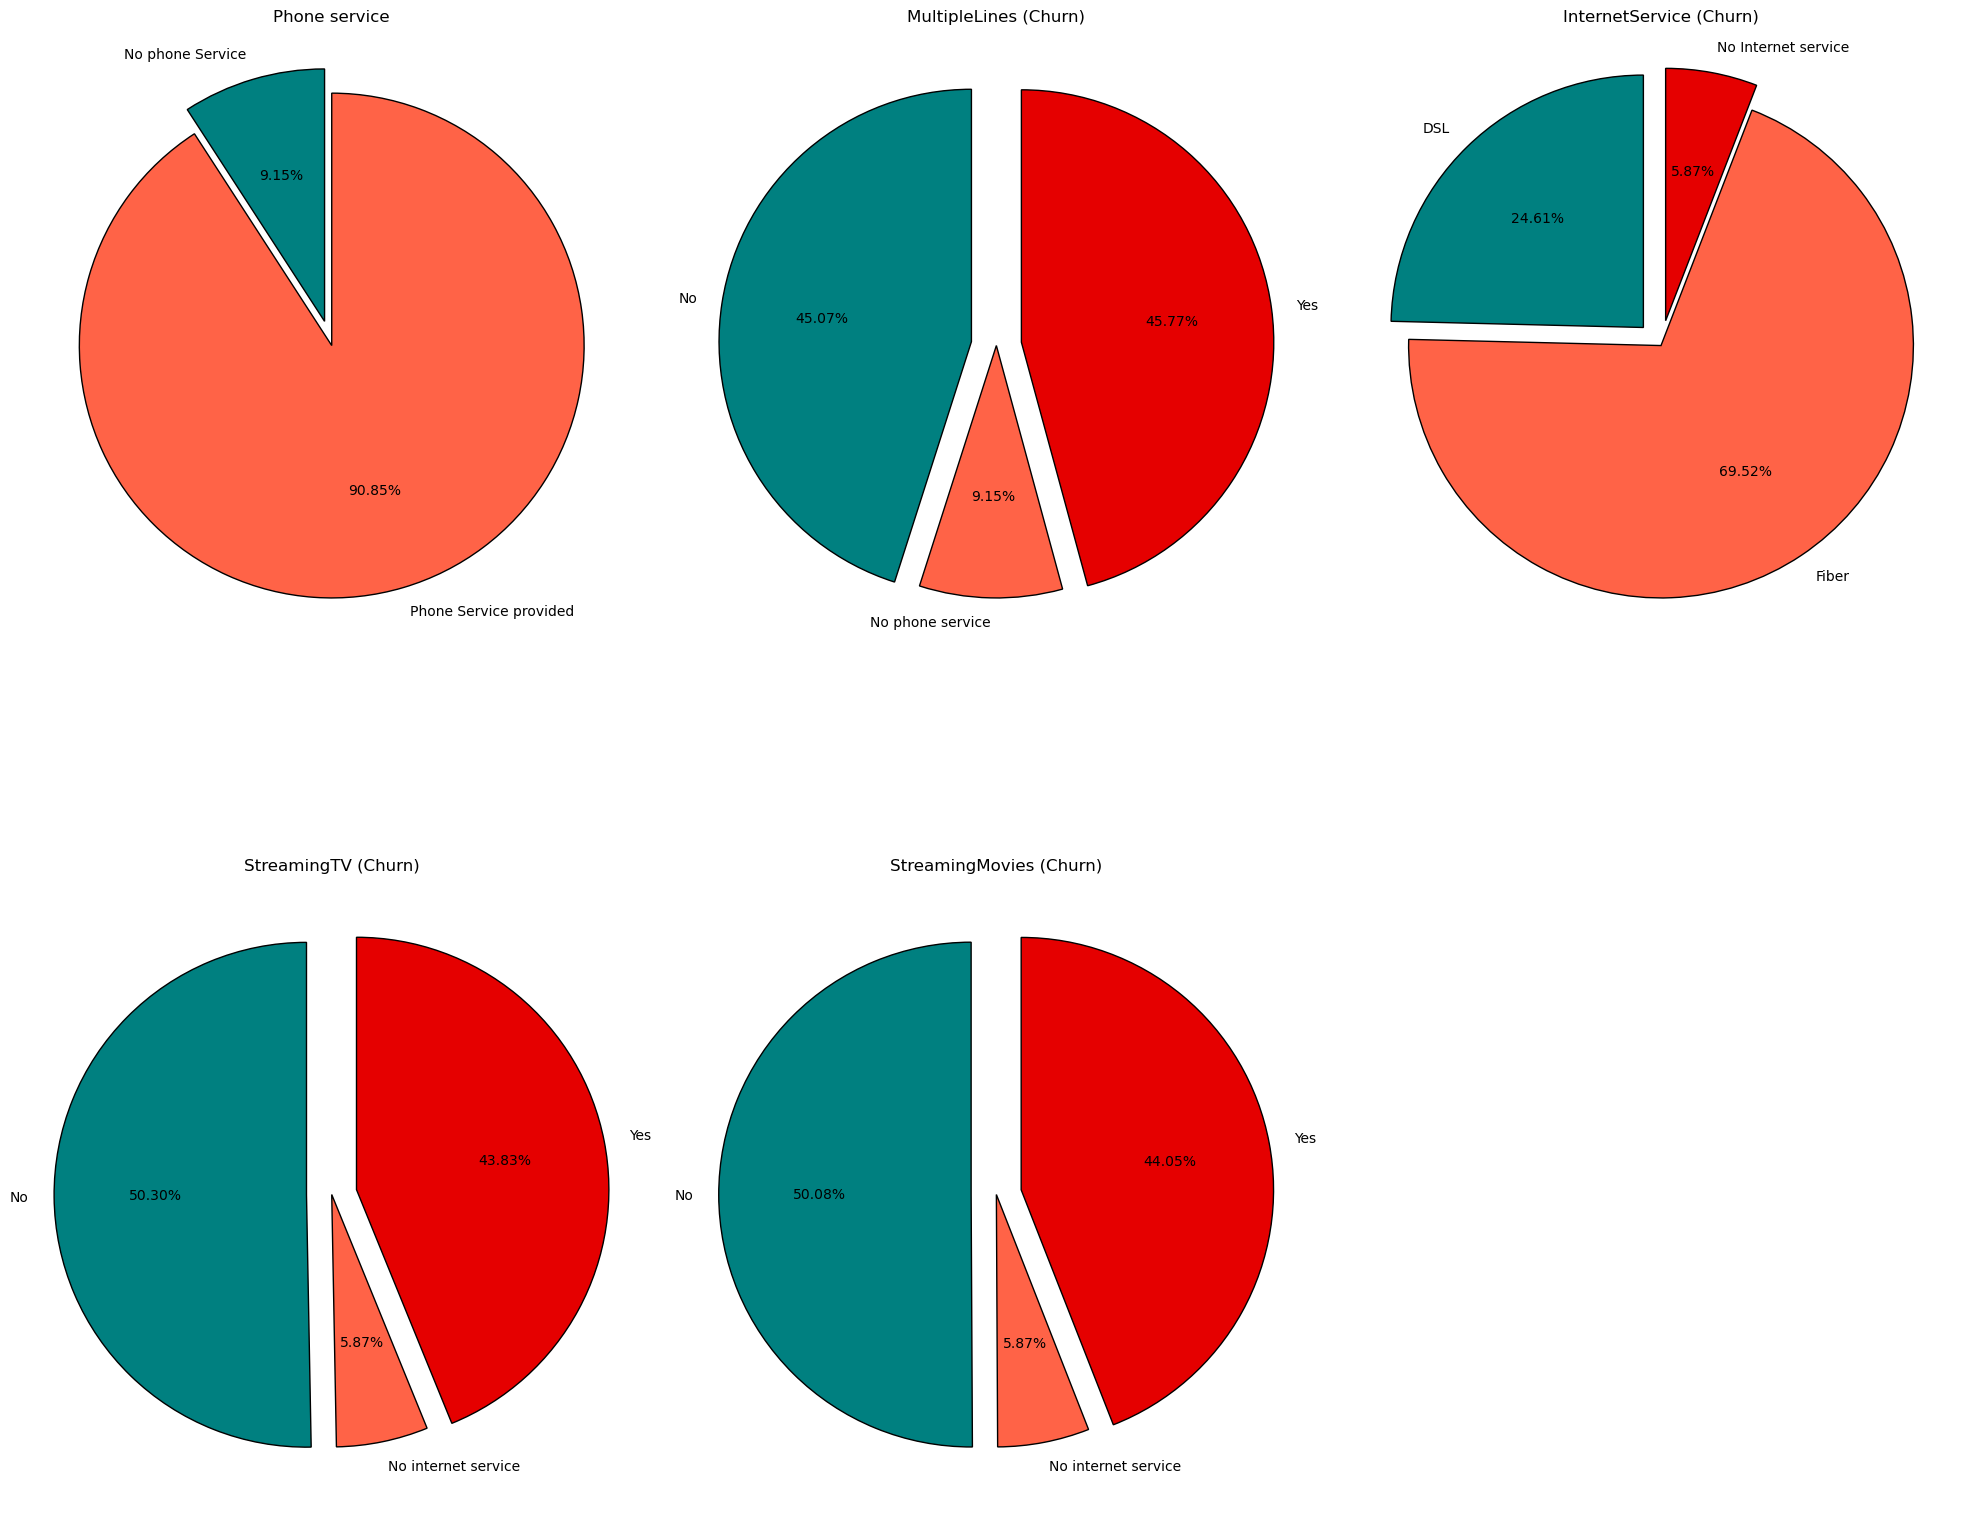

In [35]:
fig = plt.figure(figsize=(20,18))

plt.subplot(2,3,1)
plt.pie(pie_values1,labels = ['No phone Service','Phone Service provided'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Phone service')

plt.subplot(2,3,2)
plt.pie(pie_values2,labels = ['No','No phone service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines (Churn)')

plt.subplot(2,3,3)
plt.pie(pie_values3,labels = ['DSL','Fiber','No Internet service'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService (Churn)')

plt.subplot(2,3,4)
plt.pie(pie_values4,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV (Churn)')

plt.subplot(2,3,5)
plt.pie(pie_values5,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies (Churn)')

plt.tight_layout()
plt.show()

* A high number of customers who use Fiber for providing the Internet resigned from the service. On the contrary customers who are using DSL don't churn so often. 

* Customers without internet have a very low churn rate. 

<a id="5.5.3"></a>
## <b>5.5.3 <span style='color:#E1B12D'>Support services</span></b>
#### <b><span style='color:#E1B12D'>OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport</span></b>

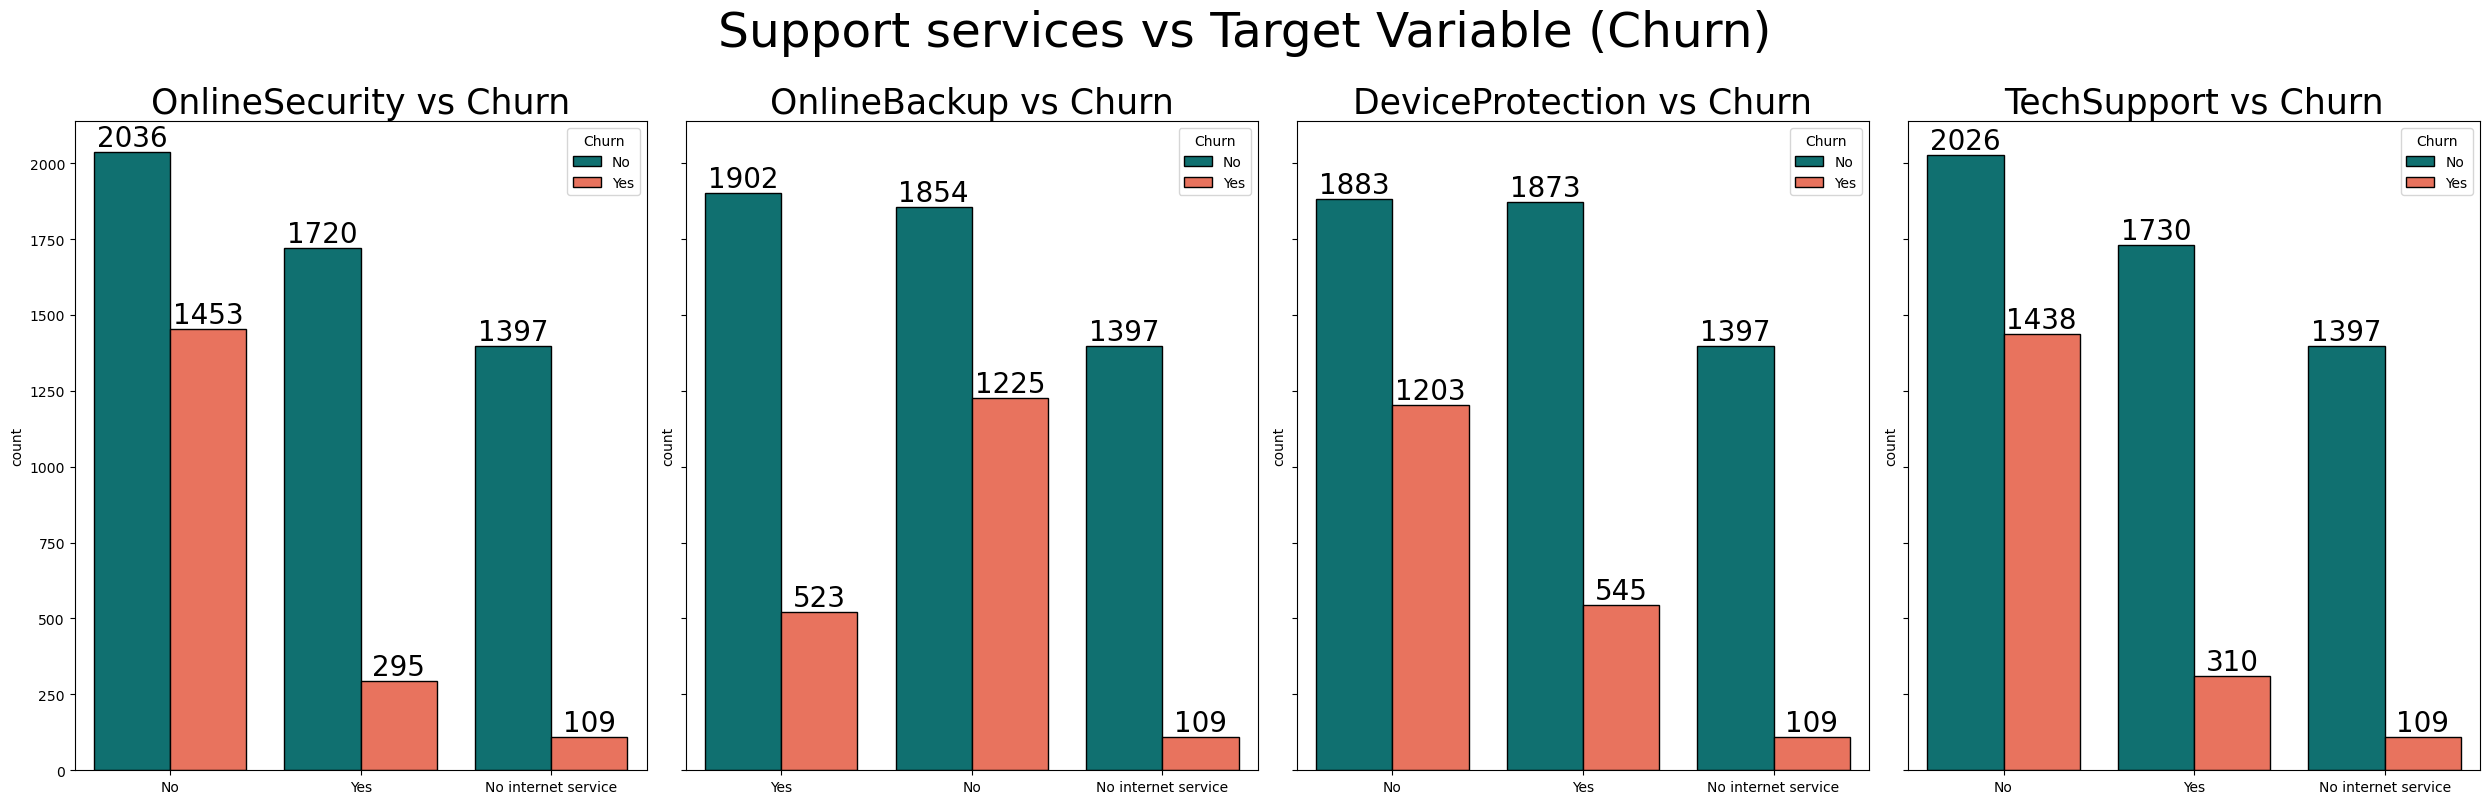

In [36]:
list3 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

countplots_custom(dataset=df, columns_list=list3, rows=1, cols=4, figsize=(25,8), hue = hue, palette = palette, suptitle='Support services vs Target Variable (Churn)')
plt.tight_layout()

In [37]:
pie_values1 = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
pie_values1 = [pie_values1[0] / sum(pie_values1) * 100, pie_values1[1] / sum(pie_values1) * 100, pie_values1[2] / sum(pie_values1) * 100]

pie_values2 = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
pie_values2 = [pie_values2[0] / sum(pie_values2) * 100, pie_values2[1] / sum(pie_values2) * 100, pie_values2[2] / sum(pie_values2) * 100]

pie_values3 = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
pie_values3 = [pie_values3[0] / sum(pie_values3) * 100, pie_values3[1] / sum(pie_values3) * 100, pie_values3[2] / sum(pie_values3) * 100]

pie_values4 = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
pie_values4 = [pie_values4[0] / sum(pie_values4) * 100, pie_values4[1] / sum(pie_values4) * 100, pie_values4[2] / sum(pie_values4) * 100]

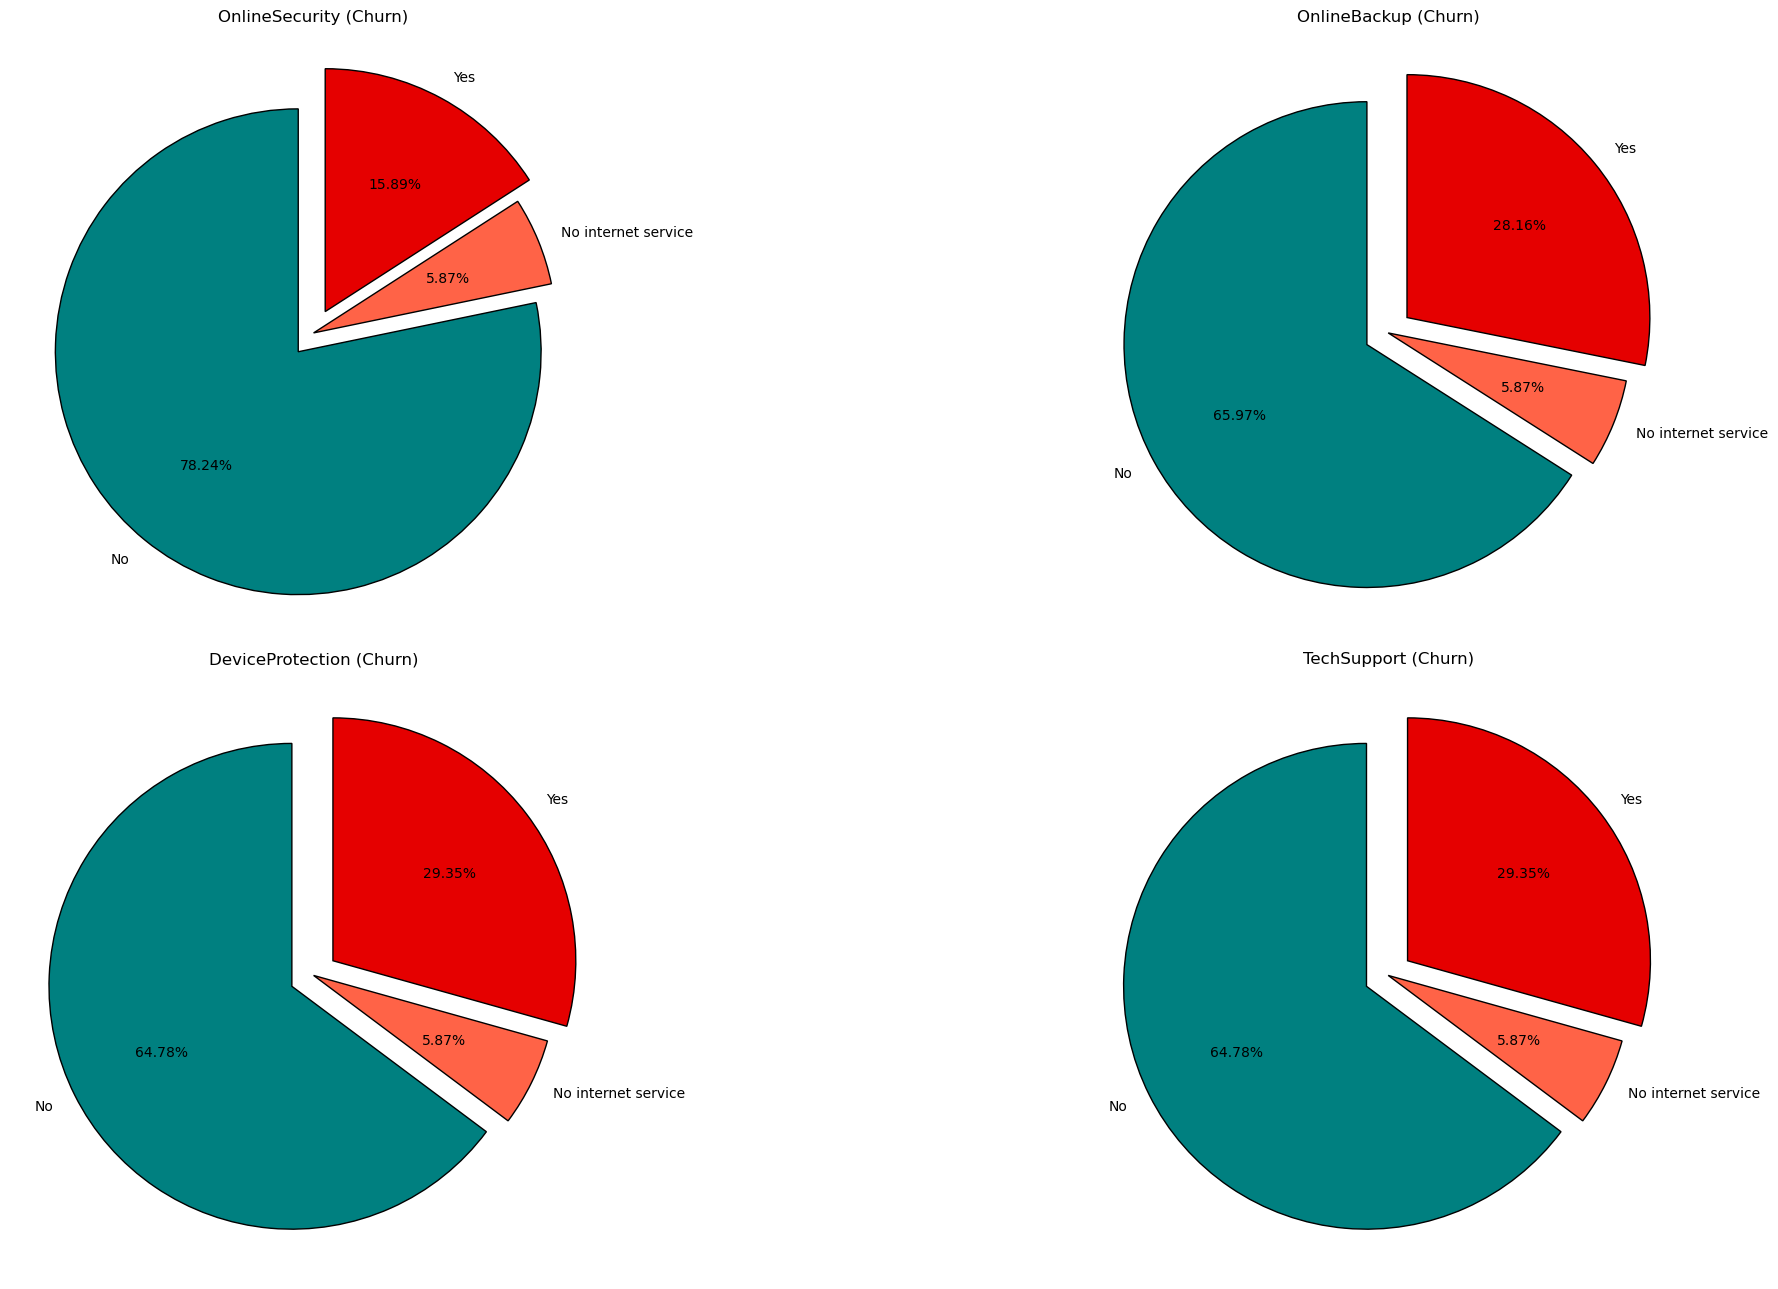

In [38]:
fig = plt.figure(figsize=(25,13))

plt.subplot(2,2,1)
plt.pie(pie_values1,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity (Churn)')

plt.subplot(2,2,2)
plt.pie(pie_values2,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup (Churn)')

plt.subplot(2,2,3)
plt.pie(pie_values3,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection (Churn)')

plt.subplot(2,2,4)
plt.pie(pie_values3,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport (Churn)')
plt.tight_layout()
plt.show()

Customers who don't subscribe support services are more likely to churn.

<a id="5.5.4"></a>
## <b>5.5.4 <span style='color:#E1B12D'>Payments</span></b>
#### <b><span style='color:#E1B12D'>Contract, PaperlessBilling, PaymentMethod</span></b>

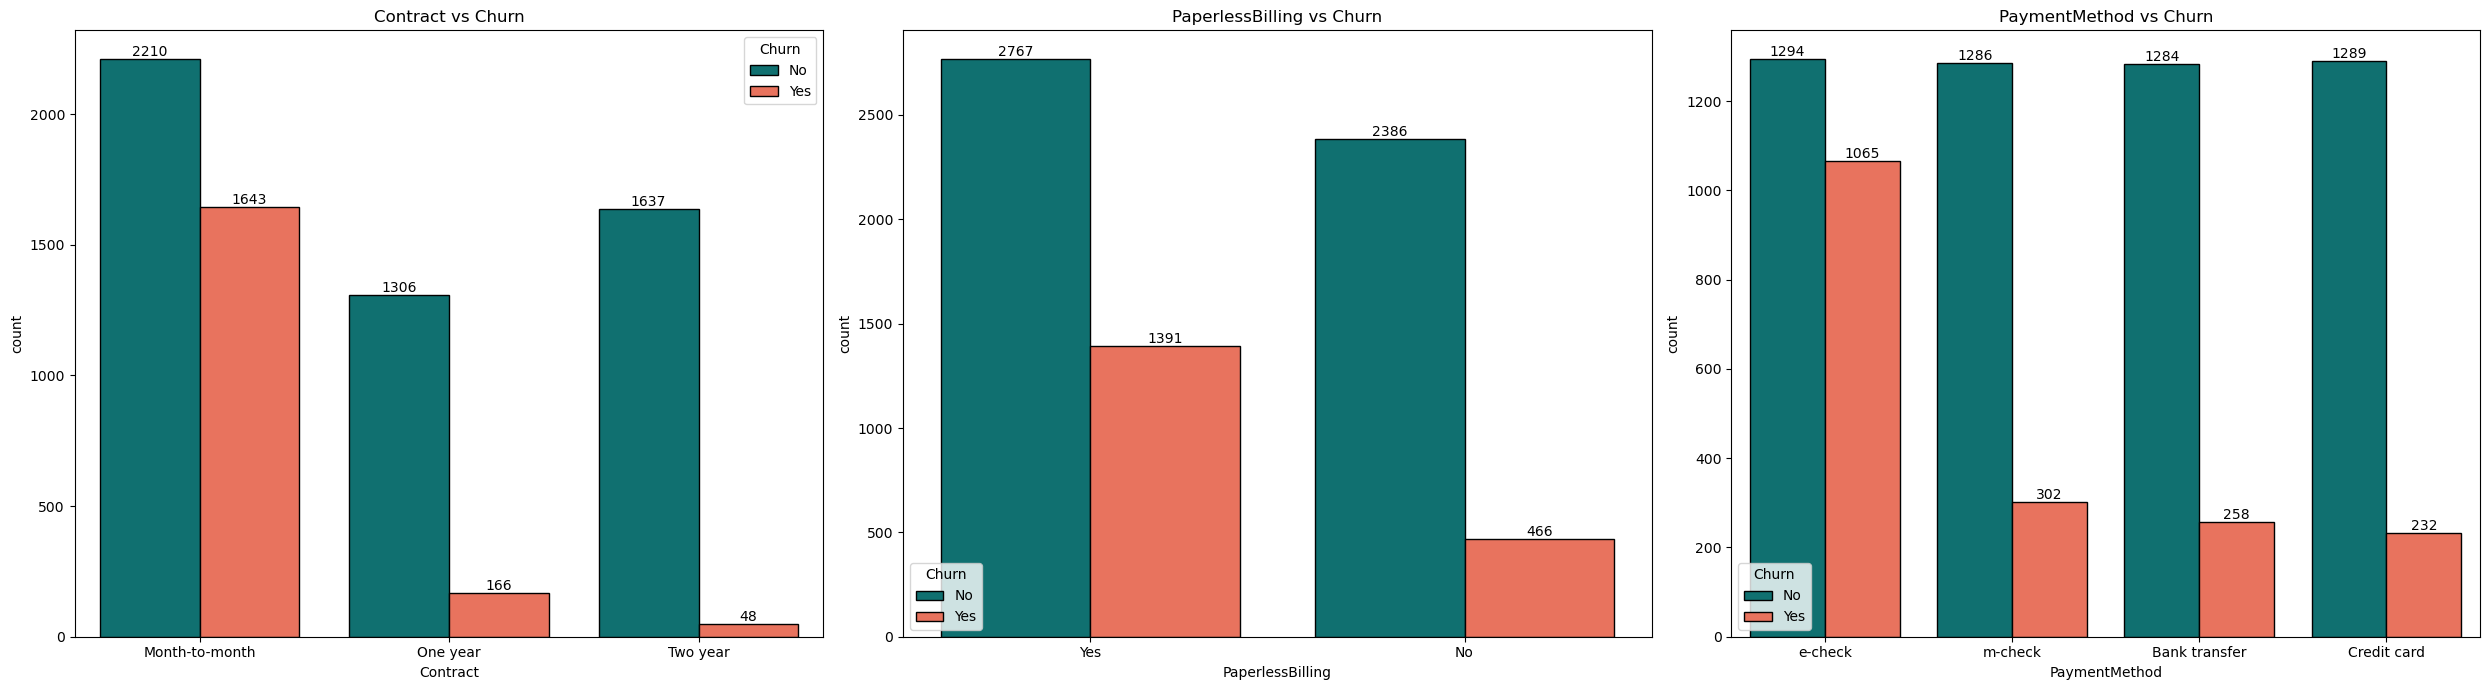

In [39]:
list3 = ['Contract','PaperlessBilling','PaymentMethod']

fig = plt.subplots(nrows = 1, ncols = 3, figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(data = df, x=list3[0], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper right', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(data = df, x=list3[1], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(data = df, x=list3[2], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['e-check','m-check','Bank transfer','Credit card'])
title = list3[2] + ' vs Churn'
plt.title(title)

plt.tight_layout()
plt.show()

In [40]:
contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
pie_values1 = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100]

paperless = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
pie_values2 = [paperless[0] / sum(paperless) * 100, paperless[1] / sum(paperless) * 100] 

payment = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
pie_values3 = [payment[0] / sum(payment) * 100, payment[1] / sum(payment) * 100, payment[2] / sum(payment) * 100, payment[3] / sum(payment) * 100] 

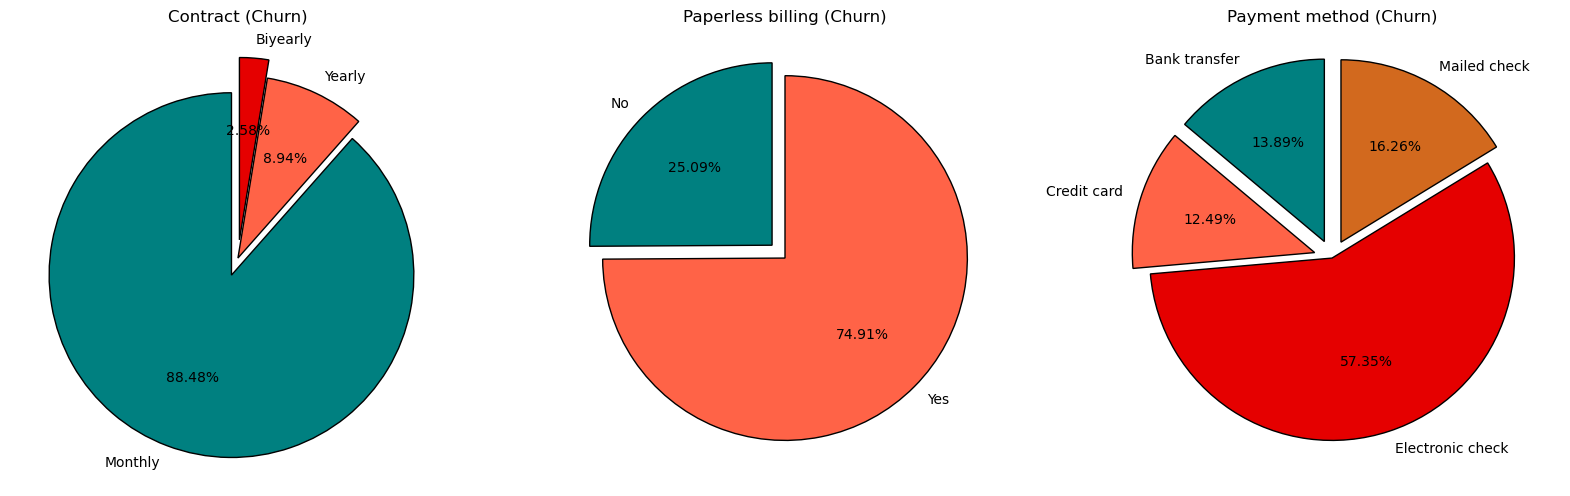

In [41]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (20,20))

plt.subplot(1,3,1)
plt.pie(pie_values1,labels = ['Monthly','Yearly','Biyearly'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract (Churn)')

plt.subplot(1,3,2)
plt.pie(pie_values2,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Paperless billing (Churn)')

plt.subplot(1,3,3)
plt.pie(pie_values3,labels = ['Bank transfer','Credit card','Electronic check','Mailed check'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Payment method (Churn)')

plt.show()

* Short term contracts have much higher churn rates.

* Customers with paperless billing are more probable to churn.

* Customers with electronic check as a payment method are much more likely to churn.

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="6"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">6 <span style='color:#CDA63A'>|</span> Feature Engineering</div>

<a id="6.1"></a>
## <b>6.1 <span style='color:#E1B12D'>Train test split - stratified splitting</span></b>

Stratified splitting means that when you generate a training / validation dataset split, it will attempt to keep the same percentages of classes in each split.

These dataset divisions are usually generated randomly according to a target variable. However, when doing so, the proportions of the target variable among the different splits can differ, especially in the case of small datasets.

In [42]:
df3=df
df3[['Churn']] = df3[['Churn']].apply(le.fit_transform) # Applying LabelEncoder to 'Churn' column

X = df3.drop('Churn', axis=1)
y = df3['Churn']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)

<a id="6.2"></a>
## <b>6.2 <span style='color:#E1B12D'>Feature scaling</span></b>

In [44]:
from sklearn.preprocessing import StandardScaler
Standard_Scaler = StandardScaler()
Standard_Scaler.fit_transform(X_train[numeric_columns])
Standard_Scaler.transform(X_test[numeric_columns])

array([[ 0.27610257,  1.01769998,  0.61931885],
       [-1.24037213, -1.53347618, -0.98780549],
       [-1.28135793, -1.33620306, -0.99803605],
       ...,
       [-1.19938633,  0.13498634, -0.90549797],
       [-0.05178385,  0.98259205,  0.30461881],
       [ 0.39905998,  1.17652156,  0.85307838]])

<a id="6.3"></a>
## <b>6.3 <span style='color:#E1B12D'>One hot Encoder</span></b>

In [45]:
print(categoric_columns)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
# Encoding multiple columns. Unfortunately you cannot pass a list here so you need to copy-paste all printed categorical columns.
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), 
     ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
      'PhoneService', 'MultipleLines', 'InternetService', 
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
      'TechSupport', 'StreamingTV', 'StreamingMovies', 
      'Contract', 'PaperlessBilling', 'PaymentMethod']))

In [47]:
# Transforming
transformed = transformer.fit_transform(X_train)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed index. Let's put it back:
transformed_df.index = X_train.index

# Joining tables
X_train = pd.concat([X_train, transformed_df], axis=1)

X_train.drop(categoric_columns, axis=1, inplace=True) # Dropping categorical columns

In [48]:
# Transforming
transformed = transformer.transform(X_test)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed index. Let's put it back:
transformed_df.index = X_test.index

# Joining tables
X_test = pd.concat([X_test, transformed_df], axis=1)

X_test.drop(categoric_columns, axis=1, inplace=True) # Dropping categorical columns

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="7"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">7 <span style='color:#CDA63A'>|</span> Model building</div>

In [49]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

<a id="7.1"></a>
## <b>7.1 <span style='color:#CDA63A'>Feature importance</span></b>

In [50]:
print(X_train.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'onehotencoder__gender_Female', 'onehotencoder__gender_Male',
       'onehotencoder__SeniorCitizen_0', 'onehotencoder__SeniorCitizen_1',
       'onehotencoder__Partner_No', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_No', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_No', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_N

In [51]:
# Setting new feature names

X_train.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1',
       'Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes',
       'PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes', 
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes', 
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes', 
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes', 
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes', 
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']

X_test.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1',
       'Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes',
       'PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes', 
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes', 
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes', 
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes', 
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes', 
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']
# After renaming the columns

X_train.head()

,Tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
1956,42,60.15,2421.60,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3135,14,76.45,1117.55,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5058,44,54.30,2390.45,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4647,32,74.75,2282.95,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
118,41,20.65,835.15,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


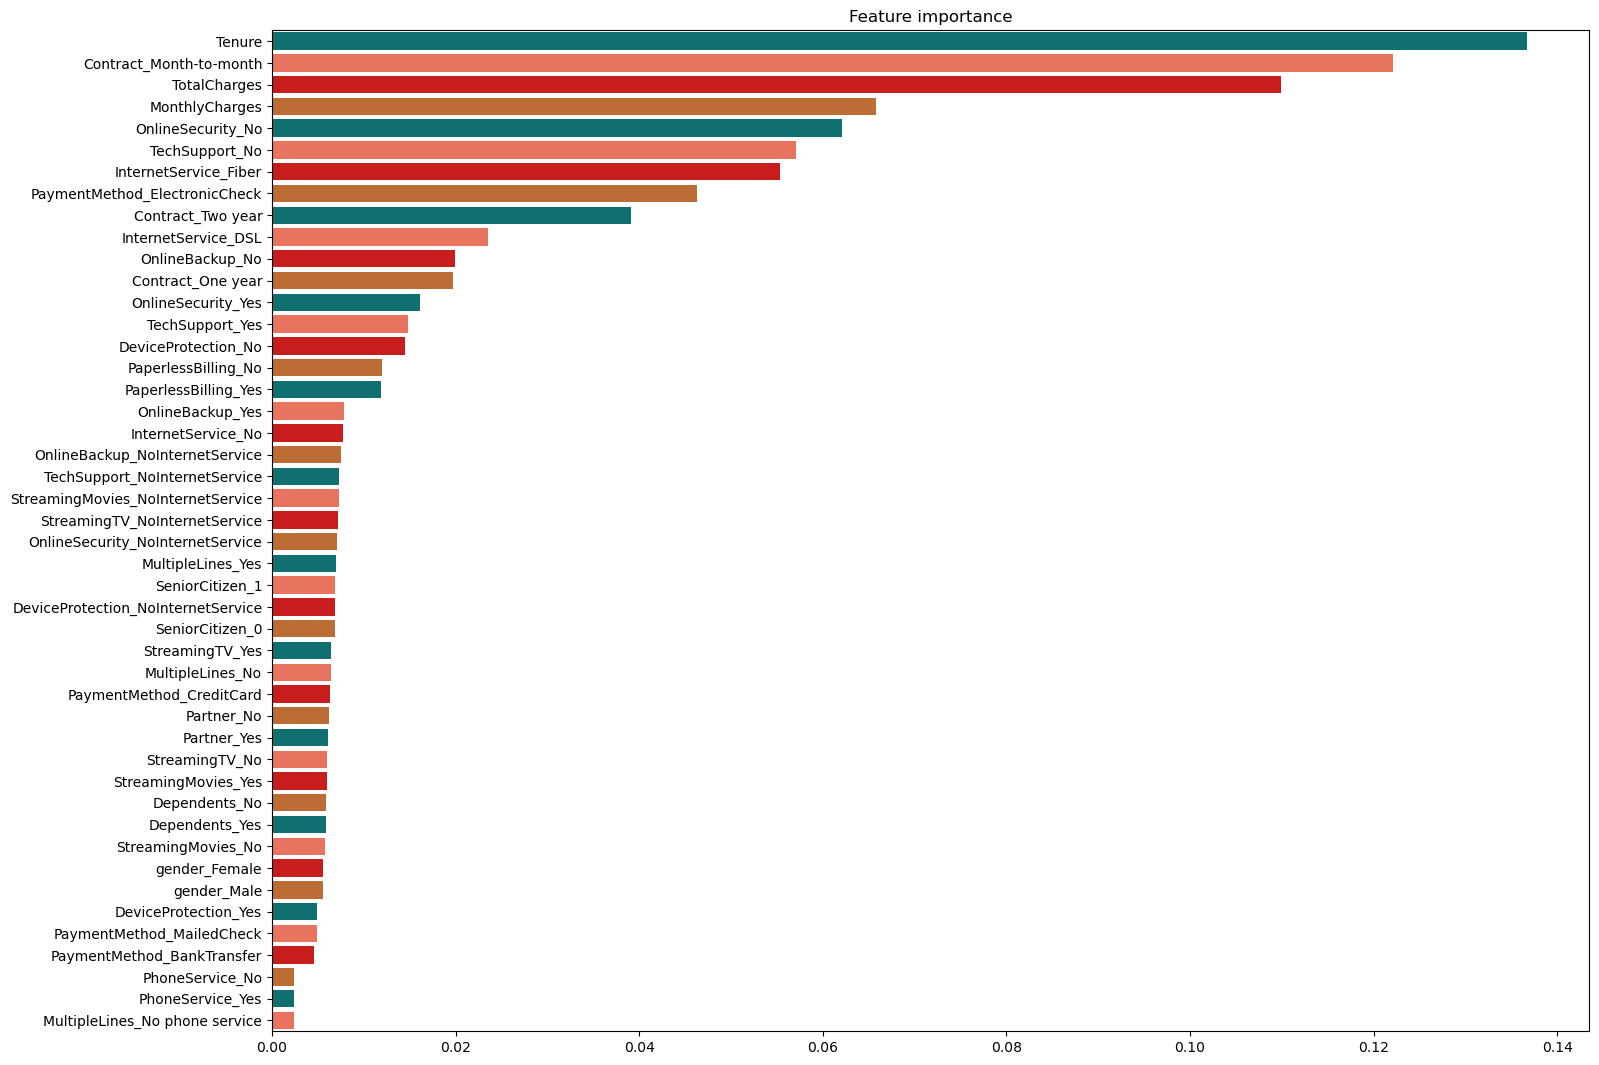

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=5000, random_state=13)
clf = clf.fit(X_train, y_train)

fimp = pd.Series(data=clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')

<a id="7.2"></a>
## <b>7.2 <span style='color:#CDA63A'>Baseline - Random Forest</span></b>

In [53]:
rf = RandomForestClassifier(random_state=13)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [54]:
rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1168  121]
 [ 241  223]]


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1289
           1       0.65      0.48      0.55       464

    accuracy                           0.79      1753
   macro avg       0.74      0.69      0.71      1753
weighted avg       0.78      0.79      0.78      1753



<a id="7.2.1"></a>
### <b>7.2.1 <span style='color:#CDA63A'>K-Fold Cross-validation</span></b>

In [56]:
from statistics import stdev
score = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall', error_score="raise")
rf_cv_score = score.mean()
rf_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', rf_cv_score)
print('Cross Validation Recall standard deviation: ', rf_cv_stdev)

Cross Validation Recall scores are: [0.44444444 0.47311828 0.49640288 0.48920863 0.52329749]
Average Cross Validation Recall score:  0.4852943451690261
Cross Validation Recall standard deviation:  0.029154464510727836


In [57]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy, rf_roc_auc, rf_cv_score, rf_cv_stdev)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest,0.480603,0.648256,0.55198,0.793497,0.693366,0.485294,0.029154


**Interpretation**:

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li>Recall score: 0,48 means that in this particular situation we were able to detect 48% of churning customers. We probably expected more so we need to tune our model. Recall is a very important score in our case.
<li>Avg CV Recall: 0.48 (the same) means that in an average situation we can expect Recall score at about 0,5 (the higher the better). Our model is probably reliable in terms of bringing recurrent results (the same score). That’s a good news.
<li>Standard Deviation of CV Recall: 0.03 tell us about expected differences with Recall Score (the lower the better). 0.026 is a good result.
<li>ROC-AUC Score: 0.70 tells us that the model is quite efficient at distinguishing between the churn customers and not churn customers.
<li>Accuracy: 0.79 tells us that the number of correct predictions (churn and not churn) made by a model in relation to the total number of predictions are 79%. Accuracy is not a good score for imbalanced data set.
<li>Precision: 0.65 tells us that when our model predicts a churn customer we have a 67% chance that the prediction is accurate (we detected a churn customer).
<li>F1 Score: 0.55 tells us how efficient our model is, taking into account both: Recall and Precision scores.
</ul>
</div>

<a id="7.2.2"></a>
### <b>7.2.2 <span style='color:#CDA63A'>Hyperparameter Tuning Using GridSearchCV</span></b>

Choosing best hyperparameters is based on the algorithm.

In [58]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [130], # 'n_estimators': [120,130,150,170,190,200],
    'max_depth': [14],  # 'max_depth': [8,10,12,14,15],
    'min_samples_split': [3], # 'min_samples_split': [3,4,5,6],
    'min_samples_leaf': [2], # 'min_samples_leaf': [1,2,3],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [59]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 130, 'random_state': 13}
Best score: 0.5046775482839535


In [60]:
y_pred = grid_rf.predict(X_test)

In [61]:
cm = confusion_matrix(y_test, y_pred)

grid_rf_Recall = recall_score(y_test, y_pred)
grid_rf_Precision = precision_score(y_test, y_pred)
grid_rf_f1 = f1_score(y_test, y_pred)
grid_rf_accuracy = accuracy_score(y_test, y_pred)
grid_roc_auc = roc_auc_score(y_test, y_pred)

print(cm)

[[1161  128]
 [ 238  226]]


<a id="7.2.3"></a>
### <b>7.2.3 <span style='color:#CDA63A'>K-Fold Cross-validation</span></b>

In [62]:
score2 = cross_val_score(grid_rf, X_train, y_train, cv=5, scoring='recall')

In [63]:
grid_cv_score = score2.mean()
grid_cv_stdev = stdev(score2)

print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', grid_cv_score)
print('Cross Validation Recall standard deviation: ', grid_cv_stdev)

Cross Validation Recall scores are: [0.47670251 0.48028674 0.50359712 0.52158273 0.54121864]
Average Cross Validation Recall score:  0.5046775482839535
Cross Validation Recall standard deviation:  0.027384842018450185


In [64]:
ndf2 = [(grid_rf_Recall, grid_rf_Precision, grid_rf_f1, grid_rf_accuracy, grid_roc_auc, grid_cv_score, grid_cv_stdev)]

grid_score = pd.DataFrame(data = ndf2, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
grid_score.insert(0, 'Model', 'Random Forest after tuning')
grid_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest after tuning,0.487069,0.638418,0.552567,0.791215,0.693884,0.504678,0.027385


**Interpretation results after tuning hyperparameters**:

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li>Recall score is better: 0,49 (was: 0,48) - that means that we were able to detect 49% of churning customers.
<li>Avg CV Recall is better: 0.50 (was: 0.48) - that means that we can expect better average results when it comes to Recall score. This is probably the most important improvement.
<li>Standard Deviation of CV Recall is almost the same: 0.027 (was: 0.03).
<li>ROC-AUC Score is: 0.69 - the model is quite efficient at distinguishing between the churn customers and not churn customers.
<li>Accuracy: 0.79 (the same) - no progress here, but that is not very important.
<li>Precision: 0,64 (the same) - when our model predicts a churn customer we have a 64% chance that the prediction is accurate (we really detect a churn customer).
<li>F1 Score: 0.55 - the result is the same.
</ul>
</div>

<a id="7.3"></a>
## <b>7.3 <span style='color:#CDA63A'>Adding another classifier - XGBoost</span></b>

Random Forest and XGBoost are both decision tree algorithms. I'd like to compare results for further model improvements.

In [65]:
from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [66]:
y_pred = XGBC.predict(X_test)

In [67]:
XGBC_Recall = recall_score(y_test, y_pred)
XGBC_Precision = precision_score(y_test, y_pred)
XGBC_f1 = f1_score(y_test, y_pred)
XGBC_accuracy = accuracy_score(y_test, y_pred)
XGBC_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1129  160]
 [ 229  235]]


<a id="7.3.1"></a>
### <b>7.3.1 <span style='color:#CDA63A'>K-Fold Cross-validation</span></b>

In [68]:
score = cross_val_score(XGBC, X_train, y_train, cv=5, scoring='recall', error_score="raise")
XGBC_cv_score = score.mean()
XGBC_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', XGBC_cv_score)
print('Cross Validation Recall standard deviation: ', XGBC_cv_stdev)

Cross Validation Recall scores are: [0.47311828 0.4874552  0.54316547 0.5323741  0.4874552 ]
Average Cross Validation Recall score:  0.5047136484360898
Cross Validation Recall standard deviation:  0.030974258006061347


In [69]:
ndf = [(XGBC_Recall, XGBC_Precision, XGBC_f1, XGBC_accuracy, XGBC_roc_auc, XGBC_cv_score, XGBC_cv_stdev)]

XGBC_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
XGBC_score.insert(0, 'Model', 'XGBC')
XGBC_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,XGBC,0.506466,0.594937,0.547148,0.778095,0.691169,0.504714,0.030974


**Interpretation after adding XGBoost Clasifier**:

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
XGBoost is usually very efficient. Scores that we received from the algorithm tells us that we should probably change something more radically to get better results e.g. introduce oversampling and/or undersampling techniques.

<li>Recall score is better: 0,50 (was: 0,49).
<li>Avg CV Recall is the same: 0.50.
<li>Standard Deviation of CV Recall is worse: 0.03.
<li>ROC-AUC Score is the same: 0.69.
<li>Accuracy is worse: 0.78 (was: 0.79).
<li>Precision: is much worse: 0.59 (was: 0,64).
<li>F1 Score is the same: 0.55.
</ul>
</div>

<a id="7.3.2"></a>
### <b>7.3.2 <span style='color:#CDA63A'>Hyperparameter Tuning Using GridSearchCV</span></b>

In [70]:
# Step 1: Searching for the optimum parameters for the learning rate and the number of estimators:
params = {'learning_rate': [0.01], #[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
              'subsample': [0.8],
              'colsample_bytree': [0.8],
              'n_estimators': [450] #range(50,500,50),
              }

grid_xgb = GridSearchCV(XGBC, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [71]:
print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'n_estimators': 450, 'subsample': 0.8}
Best score: 0.5161599752456099


In [72]:
# Step 2: Searching for the optimum parameters for max_depth and min_child_weight:
params = {'max_depth': [7], #range(3,10,2),
              'learning_rate': [0.01],
              'subsample': [0.8],
              'colsample_bytree': [0.8],
              # 'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'min_child_weight': [5], #range(1,6,2),
              'n_estimators': [450],
              # 'num_class': [10]
              }

grid_xgb = GridSearchCV(XGBC, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [73]:
print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 450, 'subsample': 0.8}
Best score: 0.5111497898455429


In [74]:
y_pred = grid_xgb.predict(X_test)

In [75]:
grid_xgb_Recall = recall_score(y_test, y_pred)
grid_xgb_Precision = precision_score(y_test, y_pred)
grid_xgb_f1 = f1_score(y_test, y_pred)
grid_xgb_accuracy = accuracy_score(y_test, y_pred)
grid_xgb_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1164  125]
 [ 227  237]]


<a id="7.3.3"></a>
### <b>7.3.3 <span style='color:#CDA63A'>K-Fold Cross-validation</span></b>

In [76]:
score = cross_val_score(grid_xgb, X_train, y_train, cv=5, scoring='recall', error_score="raise")
grid_xgb_cv_score = score.mean()
grid_xgb_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', grid_xgb_cv_score)
print('Cross Validation Recall standard deviation: ', grid_xgb_cv_stdev)

Cross Validation Recall scores are: [0.46953405 0.49820789 0.53597122 0.51798561 0.53405018]
Average Cross Validation Recall score:  0.5111497898455429
Cross Validation Recall standard deviation:  0.027778690200331396


In [77]:
ndf = [(grid_xgb_Recall, grid_xgb_Precision, grid_xgb_f1, grid_xgb_accuracy, grid_xgb_roc_auc, grid_xgb_cv_score, grid_xgb_cv_stdev)]

grid_xgb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
grid_xgb_score.insert(0, 'Model', 'Tuned XGBC')
grid_xgb_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Tuned XGBC,0.510776,0.654696,0.57385,0.799201,0.706901,0.51115,0.027779


**We were able to improve!**

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li>Recall score is better: 0,51 (was: 0,50).
<li>Avg CV Recall is better: 0.518 (was 0.504).
<li>Standard Deviation of CV Recall is better: 0.02 (was 0.03).
<li>ROC-AUC Score is better: 0.706 (was 0.691).
<li>Accuracy is almost the same: 0.799 (was: 0.778).
<li>Precision: is better: 0.657 (was 0.59).
<li>F1 Score is better: 0.57 (was: 0.55).
</ul>
</div>

<a id="7.4"></a>
## <b>7.4 <span style='color:#CDA63A'>Voting Clasifier</span></b>

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from catboost import CatBoostClassifier

In [79]:
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13) ))
estimators.append(('Bagging Classifier', BaggingClassifier(random_state=13) ))
estimators.append(('Bernoulli NB', BernoulliNB() ))
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=13) ))
estimators.append(('Dummy Classifier', DummyClassifier(random_state=13) ))
estimators.append(('Extra Tree Classifier', ExtraTreeClassifier(random_state=13) ))
estimators.append(('Extra Trees Classifier', ExtraTreesClassifier(random_state=13) ))
estimators.append(('Gaussian NB', GaussianNB() ))
estimators.append(('Gaussian Process Classifier', GaussianProcessClassifier(random_state=13) ))
estimators.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=13) ))
estimators.append(('Hist Gradient Boosting Classifier', HistGradientBoostingClassifier(random_state=13) ))
estimators.append(('KNN', KNeighborsClassifier() ))
estimators.append(('Label Propagation', LabelPropagation() ))
estimators.append(('Label Spreading', LabelSpreading() ))
estimators.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)))
estimators.append(('Logistic Regression CV', LogisticRegressionCV(max_iter=1000, random_state=13) ))
estimators.append(('MLPClassifier', MLPClassifier(max_iter=2000,random_state=13) ))
estimators.append(('Nearest Centroid', NearestCentroid() ))
estimators.append(('Passive Aggressive Classifier', PassiveAggressiveClassifier(random_state=13) ))
estimators.append(('Perceptron', Perceptron(random_state=13) ))
#estimators.append(('RadiusNeighborsClassifier', RadiusNeighborsClassifier(radius=3) ))
estimators.append(('RandomForest', RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 170, random_state=13) ))
estimators.append(('Ridge Classifier', RidgeClassifier(random_state=13) ))
estimators.append(('Ridge Classifier CV', RidgeClassifierCV() ))
estimators.append(('SGDClassifier', SGDClassifier(random_state=13) ))
estimators.append(('SVC', SVC(random_state=13)))
estimators.append(('XGB', XGBClassifier(random_state=13) ))
estimators.append(('CatBoost', CatBoostClassifier(logging_level='Silent', random_state=13) ))

In [80]:
VC_hard = VotingClassifier(estimators = estimators, voting ='hard')
VC_hard.fit(X_train, y_train)
y_pred = VC_hard.predict(X_test)

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/opt/conda/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


In [81]:
VC_hard_Recall = recall_score(y_test, y_pred)
VC_hard_Precision = precision_score(y_test, y_pred)
VC_hard_f1 = f1_score(y_test, y_pred)
VC_hard_accuracy = accuracy_score(y_test, y_pred)
VC_hard_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1171  118]
 [ 228  236]]


<a id="7.4.1"></a>
### <b>7.4.1 <span style='color:#CDA63A'>K-Fold Cross-validation</span></b>

In [82]:
score = cross_val_score(VC_hard, X_train, y_train, cv=5, scoring='recall', error_score="raise")
VC_hard_cv_score = score.mean()
VC_hard_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', VC_hard_cv_score)
print('Cross Validation Recall standard deviation: ', VC_hard_cv_stdev)

Cross Validation Recall scores are: [0.48387097 0.48387097 0.50359712 0.52877698 0.50537634]
Average Cross Validation Recall score:  0.5010984760578634
Cross Validation Recall standard deviation:  0.01860253320337491


In [83]:
ndf = [(VC_hard_Recall, VC_hard_Precision, VC_hard_f1, VC_hard_accuracy, VC_hard_roc_auc, VC_hard_cv_score, VC_hard_cv_stdev)]

VC_hard_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
VC_hard_score.insert(0, 'Model', 'Voting Clasifier - Hard Voting')
VC_hard_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Voting Clasifier - Hard Voting,0.508621,0.666667,0.577017,0.802624,0.708538,0.501098,0.018603


**This time we weren't able to improve.**

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li>Recall score is almost the same: 0.510 (was: 0.508).
<li>Avg CV Recall is worse: 0.501 (was: 0.517).
<li>Standard Deviation of CV Recall is the same: 0.02.
<li>ROC-AUC Score is almost the same: 0.708 (was: 0.706).
<li>Accuracy is almost the same: 0.80.
<li>Precision: is almost the same: 0.66.
<li>F1 Score is almost the same: 0.577).
</ul>
</div>

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="8"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">8 <span style='color:#CDA63A'>|</span> Result comparison</div>

In [84]:
predictions = pd.concat([rf_score, grid_score, XGBC_score, grid_xgb_score, VC_hard_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Avg CV Recall'], ascending=False)

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
3,Tuned XGBC,0.510776,0.654696,0.573850,0.799201,0.706901,0.511150,0.027779
2,XGBC,0.506466,0.594937,0.547148,0.778095,0.691169,0.504714,0.030974
1,Random Forest after tuning,0.487069,0.638418,0.552567,0.791215,0.693884,0.504678,0.027385
4,Voting Clasifier - Hard Voting,0.508621,0.666667,0.577017,0.802624,0.708538,0.501098,0.018603
0,Random Forest,0.480603,0.648256,0.551980,0.793497,0.693366,0.485294,0.029154


<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="8.1"></a>
## <b>8.1 <span style='color:#E1B12D'>AUC-ROC Curve for the best algorithm</span></b>

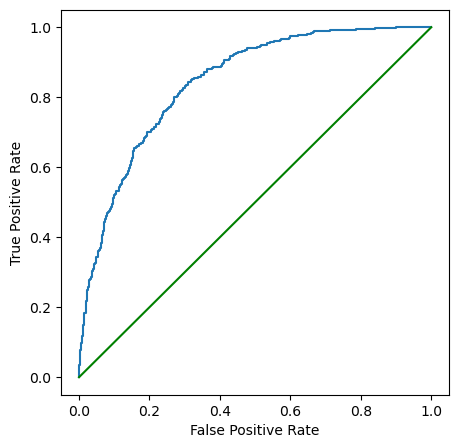

In [85]:
y_proba = grid_xgb.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
plot_auc_roc_curve(y_test, y_proba[:, 1])

<a id="8.2"></a>
## <b>8.2 <span style='color:#E1B12D'>Precision-Recall Curve (PR curve) for the best algorithm</span></b>

The precision-recall curve shows the tradeoff between precision and recalls for different thresholds.

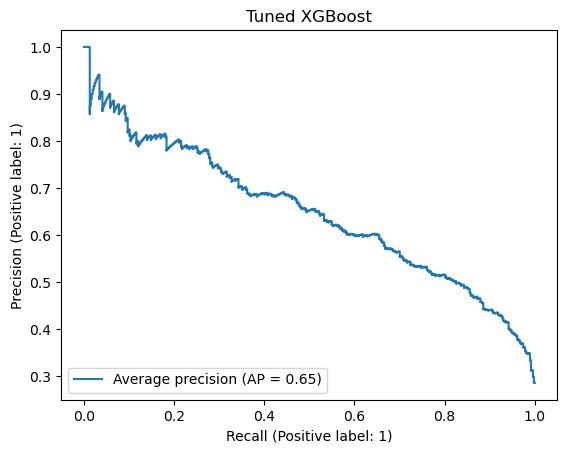

In [86]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    grid_xgb, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Tuned XGBoost")

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="9"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">9 <span style='color:#CDA63A'>|</span> Possible further improvements</div>

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li>We should consider building a model with stacking classifier.
<li>Introduce more classifiers (from the very beginning) and tune their hyperparameters.
<li>Try undersampling and oversampling techniques (like TOMEK Links and SMOTE).
<li>Extend feature engineering especially related to multicollinearity detection.
</ul>
</div>

> Check this notebook for **<mark style="background-color:#E1B12D;color:white;border-radius:5px;opacity:1.0"> information</mark>** about **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">about undersampling and oversampling techniques</mark>**: [SMOTE and Tomek Links for imbalanced data](https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data)

<a id="10"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">10 <span style='color:#CDA63A'>|</span> Check my other notebooks</div>

Here is a complete list of the notebooks I have completed so far:

* [How to create a meaningful EDA](https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda)
* [GridSearchCV + KFold CV: The Right Way](https://www.kaggle.com/code/marcinrutecki/gridsearchcv-kfold-cv-the-right-way)
* [Voting Classifier for Better Results](https://www.kaggle.com/code/marcinrutecki/voting-classifier-for-better-results)
* [SMOTE and Tomek Links for imbalanced data](https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data)
* [Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)
* [Regression Models Evaluation Metrics](https://www.kaggle.com/code/marcinrutecki/regression-models-evaluation-metrics)
* [Clustering methods - comprehensive study](https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study)
* [Outlier detection methods!](https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods)
* [Multicollinearity - detection and remedies](https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies)